# Sentiment Analysis

## 0.Loading Pakages

In [1]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import janitor 
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

## 1.Loading Data (311 Data 2020 to 2024)

In [113]:
# for csvs
#data_2020 = pd.read_csv("311_data/311_2020.csv")
#data_2021 = pd.read_csv("311_data/311_2021.csv")
#data_2022 = pd.read_csv("311_data/311_2022.csv")
#data_2023 = pd.read_csv("311_data/311_2023.csv")
#data_2024 = pd.read_csv("311_data/311_2024.csv")

In [239]:
# for shapefiles
data_2020 = gpd.read_file("311_2020_shapes/311_2020.shp")
data_2021 = gpd.read_file("311_2021_shapes/311_2021.shp")
data_2022 = gpd.read_file("311_2022_shapes/311_2022.shp")
data_2023 = gpd.read_file("311_2023_shapes/311_2023.shp")
data_2024 = gpd.read_file("311_2024_shapes/311_2024.shp")

In [240]:
datasets = [data_2020 , data_2021, data_2022, data_2023, data_2024]
for data in datasets:
    data = data.clean_names()

In [241]:
# Create a dictionary to store all the data
data_dict = {
    2020: data_2020,
    2021: data_2021,
    2022: data_2022,
    2023: data_2023,
    2024: data_2024
}

for year, df in data_dict.items():
    print(f"data_{year}: {df.shape}")

# Check the consistency of the columns
for year, df in data_dict.items():
    print(f"{year}: {df.columns}")

data_2020: (26780, 27)
data_2021: (35644, 27)
data_2022: (54382, 27)
data_2023: (64142, 25)
data_2024: (59059, 27)
2020: Index(['FID', 'service_re', 'service__1', 'sap_notifi', 'date_reque',
       'case_age_d', 'case_recor', 'service_na', 'service__2', 'date_close',
       'status', 'lat', 'lng', 'street_add', 'zipcode', 'council_di',
       'comm_plan_', 'comm_plan1', 'park_name', 'case_origi', 'specify_th',
       'referred', 'iamfloc', 'floc', 'public_url', 'public_des', 'geometry'],
      dtype='object')
2021: Index(['x', 'y', 'service_re', 'service__1', 'sap_notifi', 'date_reque',
       'case_age_d', 'case_recor', 'service_na', 'service__2', 'date_close',
       'status', 'lat', 'lng', 'street_add', 'zipcode', 'council_di',
       'comm_plan_', 'comm_pla_1', 'park_name', 'case_origi', 'referred',
       'iamfloc', 'floc', 'public_des', 'ObjectId', 'geometry'],
      dtype='object')
2022: Index(['x', 'y', 'ÿservice_', 'service_re', 'sap_notifi', 'date_reque',
       'case_age_d',

## 2.Cleaning Data

In [242]:
# Rename some columns
data_2020_clean = data_2020.drop(["FID", "service__1", "service__2", "specify_th", "public_url"], axis=1)
data_2021_clean = data_2021.drop(["x", "y", "service__1", "service__2", "ObjectId"], axis=1)
data_2022_clean = data_2022.drop(["x", "y", "service_re", "service__1", "ObjectId"], axis=1)
data_2023_clean = data_2023.drop(["service__1", "service__2", "ObjectId"], axis=1)
data_2024_clean = data_2024.drop(["x", "y", "service__1", "service__2", "ObjectId"], axis=1)
data_2022_clean.rename(columns={"ÿservice_": "service_re"}, inplace = True)

data_dict_clean = {
    2020: data_2020_clean,
    2021: data_2021_clean,
    2022: data_2022_clean,
    2023: data_2023_clean,
    2024: data_2024_clean
}

for year, df in data_dict_clean.items():
    df.rename(columns={
                        "service_re": "service_request_id",
                        "sap_notifi": "sap_notification_number",
                        "date_reque": "date_requested",
                        "case_age_d": "case_age_days",
                        "case_recor": "case_record_type",
                        "service_na": "service_name",
                        "date_close": "date_closed",
                        "street_add": "street_address",
                        "council_di": "council_district",
                        "comm_plan_": "comm_plan_code",
                        "comm_plan1": "comm_plan_name",
                        "comm_pla_1": "comm_plan_name",
                        "case_origi": "case_origin",
                        "public_des": "public_description" 
                            }, inplace=True)

In [243]:
for year, df in data_dict_clean.items():
    print(f"data_{year}: {df.shape}")
for year, df in data_dict_clean.items():
    print(f"{year}: {df.columns}")

data_2020: (26780, 22)
data_2021: (35644, 22)
data_2022: (54382, 22)
data_2023: (64142, 22)
data_2024: (59059, 22)
2020: Index(['service_request_id', 'sap_notification_number', 'date_requested',
       'case_age_days', 'case_record_type', 'service_name', 'date_closed',
       'status', 'lat', 'lng', 'street_address', 'zipcode', 'council_district',
       'comm_plan_code', 'comm_plan_name', 'park_name', 'case_origin',
       'referred', 'iamfloc', 'floc', 'public_description', 'geometry'],
      dtype='object')
2021: Index(['service_request_id', 'sap_notification_number', 'date_requested',
       'case_age_days', 'case_record_type', 'service_name', 'date_closed',
       'status', 'lat', 'lng', 'street_address', 'zipcode', 'council_district',
       'comm_plan_code', 'comm_plan_name', 'park_name', 'case_origin',
       'referred', 'iamfloc', 'floc', 'public_description', 'geometry'],
      dtype='object')
2022: Index(['service_request_id', 'sap_notification_number', 'date_requested',
   

- Concatenate the 311 datasets by row (stacked on top of each other)

In [244]:
data_concat = pd.concat([data_2020_clean, data_2021_clean, data_2022_clean, data_2023_clean, data_2024_clean], ignore_index=True)

In [245]:
data_concat.shape

(240007, 22)

- Create an variable on the proportion of letters that are all caps (besides the start of a sentence)

In [246]:
# Copy from Gabby's code
def remove_sentence_starts(text):
    if pd.isna(text):
        return ""
    return re.sub(r'(^[A-Z])|(?<=[.!?]\s)[A-Z]', '', text)

no_sentence_starts = data_concat["public_description"].apply(remove_sentence_starts)
data_concat["prop_uppercase"] = (no_sentence_starts.str.count(r"[A-Z]"))/(no_sentence_starts.str.len())

In [247]:
# Capital Words
def proportion_all_caps(text):
    if not isinstance(text, str):
        return 0
    words = re.findall(r'\b[A-Za-z]{2,}\b', text)
    if len(words) == 0:
        return 0
    all_caps = [w for w in words if w.isupper()]
    return len(all_caps) / len(words)

data_concat["prop_all_caps"] = data_concat["public_description"].apply(proportion_all_caps)

In [248]:
# Exclamation & Question marks
data_concat["num_exclamation"] = data_concat["public_description"].str.count("!")
data_concat["num_question"] = data_concat["public_description"].str.count("\?")

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:3: SyntaxWarning: invalid escape sequence '\?'
C:\Users\User\AppData\Local\Temp\ipykernel_19812\907518786.py:3: SyntaxWarning: invalid escape sequence '\?'
  data_concat["num_question"] = data_concat["public_description"].str.count("\?")


- Clean Text 

In [249]:
# Clean Text
def clean_text(df, col_name):
    return (
        df[col_name]
        .fillna("")     #Replaces all missing values with an empty string ""
        .str.lower()    #Converts all text to lowercase
        .str.replace(r"http\S+", "", regex=True) #Removes http...
        .str.replace(f"[{string.punctuation}]", "", regex=True) #Removes all punctuation marks from the text
        .str.replace(r"\s+", " ", regex=True) #Replaces multiple spaces or whitespace characters
        .str.strip()    #Removes leading and trailing spaces from each text string
    )

data_concat["clean_text"] = clean_text(data_concat, "public_description")
data_concat["word_count"] = data_concat["clean_text"].str.split().str.len()

In [250]:
def clean_text_for_sentiment_ana(df, col_name):
    return (
        df[col_name]
        .fillna("")                            
        .str.replace(r"http\S+", "", regex=True)  
        .str.replace(r"\s+", " ", regex=True)  
        .str.strip()                           
    )

data_concat["clean_text_for_sentiment"] = clean_text_for_sentiment_ana(data_concat, "public_description")

In [251]:
data_concat = data_concat[
    data_concat["clean_text_for_sentiment"].notna() & 
    (data_concat["clean_text_for_sentiment"].str.strip() != "")
]

In [252]:
# check spelling
from spellchecker import SpellChecker

spell = SpellChecker()

def find_misspelled_words(text):
    if not isinstance(text, str):
        return []
    words = text.split()
    misspelled = spell.unknown(words)
    return list(misspelled)

data_concat["misspelled_words"] = data_concat["clean_text"].apply(find_misspelled_words)
data_concat["num_misspelled"] = data_concat["misspelled_words"].apply(len)

print(data_concat[["clean_text", "misspelled_words", "num_misspelled"]].head())

                                          clean_text misspelled_words  \
0                                         trash left               []   
1  homeless people smoking crack next to playgrou...               []   
2  people outside back gate confrontational smoki...               []   
3  homeless person in front yard of recently sold...               []   
4  this alley has become a regular living area fo...        [wouldnt]   

   num_misspelled  
0               0  
1               0  
2               0  
3               0  
4               1  


In [253]:
# Create time columns
def time_machine(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name], errors="coerce")
    df["year"] = df[col_name].dt.year
    df["month"] = df[col_name].dt.month
    df["day"] = df[col_name].dt.day
    df["date"] = df[col_name].dt.date
    df["time"] = df[col_name].dt.hour + 1

    def get_time_period(row):
        hour = row[col_name].hour
        month = row["month"]
        if month in [1, 11, 12]:  
            return "Light" if 7 <= hour < 17 else "Dark"
        elif month in [2, 10]:
            return "Light" if 7 <= hour < 18 else "Dark"
        elif month in [3, 9]:
            return "Light" if 7 <= hour < 19 else "Dark"
        elif month == 4:
            return "Light" if 6 <= hour < 19 else "Dark"
        elif 5 <= month <= 8:
            return "Light" if 6 <= hour < 20 else "Dark"

    df["time_period"] = df.apply(get_time_period, axis=1)
    df["week_type"] = df[col_name].dt.dayofweek.apply(lambda d: "Weekend" if d >= 5 else "Weekday")
    
    return df

data_concat = time_machine(data_concat, "date_requested")

In [254]:
# reproject to California Zone 6
data_concat = data_concat.to_crs(epsg=2230)

In [255]:
data_concat.shape

(230900, 38)

### Preparing data to join with other variables

- Spatial join with Land Use

In [140]:
# land_use = gpd.read_file(" ")

In [121]:
# land_use.head()
# len(land_use)

In [122]:
# print(land_use.DESCRIPTIO.unique())
# len(land_use.DESCRIPTIO.unique())

In [123]:
# land_use.plot(column="DESCRIPTIO")

Condense into fewer categories:

Residential
Institutional/Group Quarters
Industrial
Commercial
Transportation/Utilities
Recreation/Open Space
Agricultural
Water/Natural Features
Vacant/Under Construction

In [124]:
# land_use['land_use_binned'] = land_use['DESCRIPTIO'].case_when(
#     [
#         # Residential
#        (land_use['DESCRIPTIO'].isin([
#             'Spaced Rural Residential', 'Spaced Rural Residential Without Units',
#             'Single Family Detached', 'Single Family Multiple-Units',
#             'Single Family Residential Without Units', 'Multi-Family Residential',
#             'Multi-Family Residential Without Units', 'Mobile Home Park',
#             "Single Room Occupancy Units (SRO's)"
#         ]), "Residential"),

#         # Institutional / Group Quarters
#         (land_use['DESCRIPTIO'].isin([
#             'Jail/Prison', 'Dormitory', 'Military Barracks', 'Monastery',
#             'Other Group Quarters Facility', 'UCSD/VA Hospital/Balboa Hospital',
#             'Hospital - General', 'Other Health Care', 'Military Use',
#             'Military Training', 'Weapons Facility', 'SDSU/CSU San Marcos/UCSD',
#             'Other University or College', 'Junior College', 'Senior High School',
#             'Junior High School or Middle School', 'Elementary School',
#             'School District Office', 'Other School', 'Library', 'Post Office',
#             'Mission', 'Religious Facility', 'Other Public Services', 'Fire/Police Station'
#         ]), "Institutional"),

#         # Industrial
#         (land_use['DESCRIPTIO'].isin([
#             'Heavy Industry', 'Industrial Park', 'Light Industry - General',
#             'Warehousing', 'Public Storage', 'Extractive Industry',
#             'Junkyard/Dump/Landfill'
#         ]), "Industrial"),

#         # Commercial
#         (land_use['DESCRIPTIO'].isin([
#             'Wholesale Trade', 'Regional Shopping Center', 'Community Shopping Center',
#             'Neighborhood Shopping Center', 'Specialty Commercial',
#             'Automobile Dealership', 'Arterial Commercial', 'Service Station',
#             'Other Retail Trade and Strip Commercial', 'Office (High-Rise)',
#             'Office (Low-Rise)', 'Government Office/Civic Center','Hotel/Motel (High-Rise)', 'Hotel/Motel (Low-Rise)', 'Resort',
#             'Cemetery'
#         ]), "Commercial"),

#         # Mixed use
#         (land_use['DESCRIPTIO'].isin(["Mixed Use"]), "Mixed Use"),

#         # Transportation / Utilities
#         (land_use['DESCRIPTIO'].isin([
#             'Commercial Airport', 'Military Airport', 'General Aviation Airport',
#             'Airstrip', 'Rail Station/Transit Center', 'Freeway', 'Road Right of Way',
#             'Railroad Right of Way', 'Park and Ride Lot', 'Parking Lot - Surface',
#             'Parking Lot - Structure', 'Other Transportation',
#             'Communications and Utilities', 'Marine Terminal'
#         ]), "Transportation"),

#         # Recreation / Open Space
#         (land_use['DESCRIPTIO'].isin([
#             'Tourist Attraction', 'Stadium/Arena', 'Racetrack', 'Golf Course',
#             'Golf Course Clubhouse', 'Convention Center', 'Marina',
#             'Olympic Training Center', 'Casino', 'Other Recreation - High',
#             'Other Recreation - Low', 'Park - Active', 'Open Space Park or Preserve',
#             'Beach - Active', 'Beach - Passive', 'Landscape Open Space',
#             'Residential Recreation', 'Undevelopable Natural Area'
#         ]), "Rec / Open Space"),

#         #  Agricultural
#         (land_use['DESCRIPTIO'].isin([
#             'Orchard or Vineyard', 'Intensive Agriculture', 'Field Crops'
#         ]), "Agricultural"),

#         #  Water / Natural
#         (land_use['DESCRIPTIO'].isin([
#             'Water', 'Bay or Lagoon', 'Lake/Reservoir/Large Pond'
#         ]), "Water"),


#         #  Vacant 
#         (land_use['DESCRIPTIO'].isin([
#             'Vacant and Undeveloped Land','Residential Under Construction', 'School Under Construction',
#             'Industrial Under Construction', 'Office Under Construction', 'Commercial Under Construction',
#             'Freeway Under Construction', 'Road Under Construction'
#         ]), "Vacant / Under Construction")
#     ]
    
# )

In [119]:
# land_use.head()

In [120]:
# land_use.crs

- Join with 311 data

In [ ]:
# save to shp
# land_use_311.to_file("modified_data/land_use_311.shp")

In [256]:
# save to csv
# data_concat.to_csv("all_years_311.csv", index=False)

In [257]:
# save to shp
# data_concat.to_file("all_years_311.shp")

C:\Users\User\AppData\Local\Temp\ipykernel_19812\706964609.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  data_concat.to_file("all_years_311.shp")
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'service_request_id' to 'service_re'
  ogr_write(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'sap_notification_number' to 'sap_notifi'
  ogr_write(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'date_requested' to 'date_reque'
  ogr_write(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field date_reque create as date field, though DateTime requested.
  ogr_write(
C:\Users\User\AppData\Local\Pro

In [130]:
#data_concat = gpd.read_file("modified_data/all_years_311.shp")

## 3.Sentiment Analysis

In [161]:
df_sentiment = data_concat[
    data_concat["clean_text_for_sentiment"].notna() & 
    (data_concat["clean_text_for_sentiment"].str.strip() != "")
].copy()

print(len(data_concat))
print(len(df_sentiment))

df_sentiment.head()

230900
230900


service_request_id sap_notification_number date_requested  case_age_days  \
0             2856645                    None     2020-01-19              2   
1             2856658                    None     2020-01-19              2   
2             2856660                    None     2020-01-19              2   
3             2856674                    None     2020-01-19              0   
4             2856676                    None     2020-01-19              5   

        case_record_type service_name date_closed  status        lat  \
0  Neighborhood Policing   Encampment  2020-01-21  Closed  32.690739   
1  Neighborhood Policing   Encampment  2020-01-21  Closed  32.739258   
2  Neighborhood Policing   Encampment  2020-01-21  Closed  32.755149   
3  Neighborhood Policing   Encampment  2020-01-19  Closed  32.739992   
4   ESD Complaint/Report   Encampment  2020-01-24  Closed  32.749275   

          lng  ...                         geometry prop_uppercase  \
0 -117.094065  ...  POINT (6301971.982 1832154.545)            0.0   
1 -117.158897  ...  POINT (6282179.562 1849974.834)            0.0   
2 -117.085003  ...  POINT (6304947.819 1855566.593)            0.0   
3 -117.244911  ...    POINT (6255733.327 1850483.5)            0.0   
4 -117.161033  ...  POINT (6281554.383 1853625.149)            0.0   

   prop_all_caps  num_exclamation num_question  \
0            0.0              0.0          0.0   
1            0.0              0.0          0.0   
2            0.0              0.0          0.0   
3            0.0              0.0          0.0   
4            0.0              0.0          0.0   

                                          clean_text word_count  \
0                                         trash left          2   
1  homeless people smoking crack next to playgrou...         16   
2  people outside back gate confrontational smoki...         16   
3  homeless person in front yard of recently sold...          9   
4  this alley has become a regular living area fo...         43   

                            clean_text_for_sentiment misspelled_words  \
0                                         Trash left               []   
1  Homeless people smoking crack next to playgrou...               []   
2  People outside back gate, confrontational, smo...               []   
3  Homeless person in front yard of recently sold...               []   
4  This alley has become a regular living area fo...        [wouldnt]   

  num_misspelled  
0              0  
1              0  
2              0  
3              0  
4              1  

[5 rows x 31 columns]

In [48]:
# Random Sample
sample_fraction = 0.05
df_sample = df_sentiment.sample(frac=sample_fraction, random_state=42).copy()

print(len(df_sentiment))
print(len(df_sample))

230900
11545


In [49]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = model.encode(
    df_sample["clean_text_for_sentiment"].tolist(),
    show_progress_bar=True
)

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 01347155-20ea-4dbe-b8bc-6742402a69e8)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 361/361 [00:52<00:00,  6.87it/s]


In [50]:
import umap.umap_ as umap

umap_embeddings = umap.UMAP(
    n_neighbors=15,
    n_components=5,
    metric='cosine',
    min_dist=0.0
).fit_transform(embeddings)

In [54]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=10,
    metric='euclidean',
    cluster_selection_method='eom'
)

labels = clusterer.fit_predict(umap_embeddings)
df_sample["cluster"] = labels

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [55]:
for c in sorted(df_sample["cluster"].unique()):
    print("\n=== CLUSTER", c, "===")
    sample_texts = df_sample[df_sample["cluster"] == c]["clean_text_for_sentiment"].head(3).tolist()
    for t in sample_texts:
        print("-", t)


=== CLUSTER -1 ===
- The gate on the 2nd Ave bridge nearest Date does not appear to be secured. Homeless are encamped right next to it. Trash, including a mattress on the slope, are in the space behind the fence. Please clean and secure this area.
- Encampment is growing . Nothing done about it
- Encampment on sidewal. Trash in canyon/

=== CLUSTER 0 ===
- Encampment
- Encampment
- Encampment

=== CLUSTER 1 ===
- Homeless outreach library
- Homeless outreach
- Homeless outreach

=== CLUSTER 2 ===
- Aggreaaive encampment near school, it has been months now, plural... PLEASE HELP
- Encampments
- Encampments

=== CLUSTER 3 ===
- Homeless camp
- Homeless camp
- Homeless camp

=== CLUSTER 4 ===
- Homeless Encampment
- Homeless Encampment
- Homeless Encampment

=== CLUSTER 5 ===
- Camping
- Camping
- Bums camped in carport

=== CLUSTER 6 ===
- Homeless encampment with fire. The fire has been extinguished. RP is SDFD.
- Homeless encampment with fire. The fire has been extinguished. RP is SDF

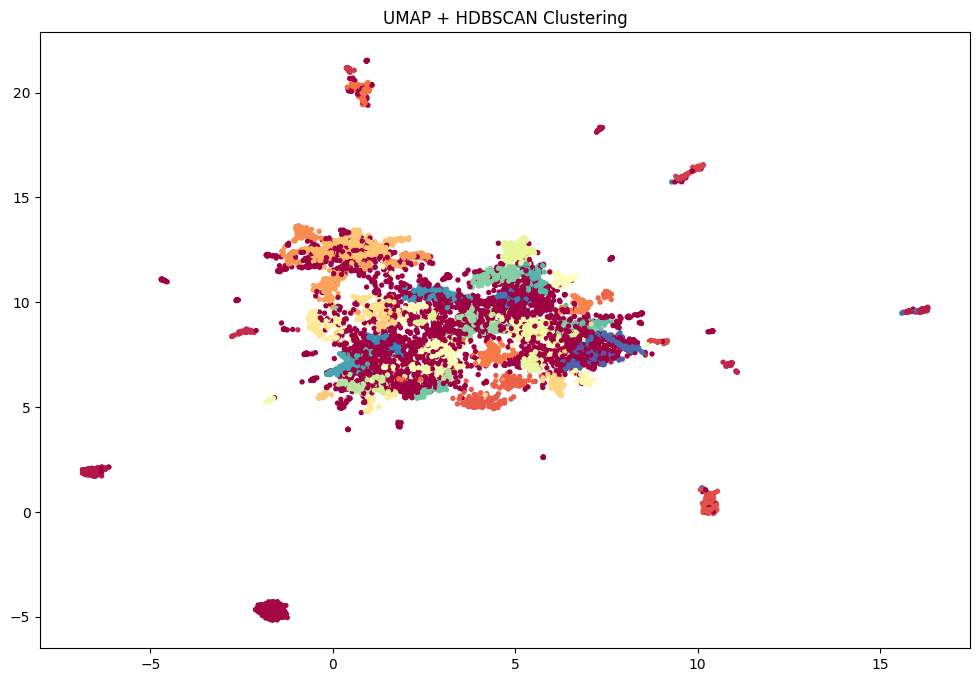

In [56]:
umap_2d = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine'
).fit_transform(embeddings)

plt.figure(figsize=(12,8))
plt.scatter(umap_2d[:,0], umap_2d[:,1], c=labels, s=8, cmap='Spectral')
plt.title("UMAP + HDBSCAN Clustering")
plt.show()

In [57]:
labels_7 = [
    "public_safety_concern",     # C1
    "sanitation_environment",    # C2
    "obstruction_accessibility", # C3
    "illegal_activity_crime",    # C4
    "neutral_encampment",        # C5
    "vehicle_based_homelessness",# C6
    "humanitarian_concern"       # C7
]

In [58]:
# C1: public_safety_concern
keywords_public_safety = [
    "fire", "aggressive", "threat", "weapon", "danger",
    "screaming", "fighting", "unsafe", "harass", 
    "near school", "elementary", "violent"
]

# C2: sanitation_environment
keywords_sanitation = [
    "trash", "feces", "urine", "vomit", "smell",
    "odor", "debris", "litter", "filth", "dirty"
]

# C3: obstruction_accessibility
keywords_obstruction = [
    "blocking sidewalk", "blocking", "block access",
    "bike path", "sidewalk", "obstruct", "no access",
    "impeding", "blocking walkway"
]

# C4: illegal_activity_crime
keywords_illegal = [
    "drug", "theft", "stolen", "chop shop",
    "breaking into", "crime", "illegal"
]

# C5: neutral_encampment
keywords_neutral = [
    "encampment", "tent", "camp", "homeless encampment"
]

# C6: vehicle_based_homelessness
keywords_vehicle = [
    "rv ", "motorhome ", "camper ", "trailer",
    "vehicle habitation", "parking violation"
]

# C7: humanitarian_concern
keywords_humanitarian = [
    "help", "outreach", "support services",
    "willing to accept services", "needs assistance"
]


In [59]:
def classify_text_7_categories(text):

    t = text.lower()

    # C4
    for kw in keywords_illegal:
        if kw in t:
            return "illegal_activity_crime"
    
    # C1
    for kw in keywords_public_safety:
        if kw in t:
            return "public_safety_concern"

    # C2
    for kw in keywords_sanitation:
        if kw in t:
            return "sanitation_environment"

    # C3
    for kw in keywords_obstruction:
        if kw in t:
            return "obstruction_accessibility"

    # C6
    for kw in keywords_vehicle:
        if kw in t:
            return "vehicle_based_homelessness"

    # C7
    for kw in keywords_humanitarian:
        if kw in t:
            return "humanitarian_concern"

    # C5
    return "neutral_encampment"


In [60]:
df_sample["sentiment_7cat"] = df_sample["clean_text_for_sentiment"].apply(classify_text_7_categories)

In [61]:
df_sample["sentiment_7cat"].value_counts()

sentiment_7cat
neutral_encampment            6537
illegal_activity_crime        1285
sanitation_environment        1139
obstruction_accessibility     1082
public_safety_concern          867
vehicle_based_homelessness     479
humanitarian_concern           156
Name: count, dtype: int64

In [62]:
df_sample[df_sample["sentiment_7cat"]=="vehicle_based_homelessness"].head(5)

service_request_id sap_notification_number date_requested  \
214583             4831652                    None     2024-07-10   
84161              3783451                    None     2022-05-27   
121050             4085899                    None     2023-01-29   
92551              3845872                    None     2022-07-18   
202359             4727591                    None     2024-04-26   

        case_age_days       case_record_type service_name date_closed  status  \
214583              4  Neighborhood Policing   Encampment  2024-07-13  Closed   
84161              75  Neighborhood Policing   Encampment  2022-08-09  Closed   
121050              4  Neighborhood Policing   Encampment  2023-02-02  Closed   
92551              16  Neighborhood Policing   Encampment  2022-08-03  Closed   
202359             11  Neighborhood Policing   Encampment  2024-05-07  Closed   

              lat         lng  ... prop_all_caps num_exclamation  \
214583  32.703075 -117.131619  ...      0.111111             0.0   
84161   32.758860 -117.121856  ...      0.000000             0.0   
121050  32.800530 -117.115462  ...      0.500000             0.0   
92551   32.780792 -117.110478  ...      0.000000             0.0   
202359  32.751923 -117.065253  ...      0.000000             0.0   

        num_question                                         clean_text  \
214583           0.0  rv has been parked for cover a week without mo...   
84161            3.0  winnebago camper regularly parks for weeks at ...   
121050           0.0                                          rv parked   
92551            0.0                            camper parked on street   
202359           0.0                                  parking violation   

       word_count                           clean_text_for_sentiment  \
214583         10  RV has been parked for cover a week without mo...   
84161          37  Winnebago camper regularly parks for weeks at ...   
121050          2                                          RV parked   
92551           4                            Camper Parked on Street   
202359          2                                  Parking violation   

       misspelled_words num_misspelled cluster              sentiment_7cat  
214583             [rv]              1      24  vehicle_based_homelessness  
84161    [dont, theyve]              2      -1  vehicle_based_homelessness  
121050             [rv]              1      24  vehicle_based_homelessness  
92551                []              0      22  vehicle_based_homelessness  
202359               []              0      20  vehicle_based_homelessness  

[5 rows x 33 columns]

In [64]:
# save to csv
# df_sample.to_csv("df_sample_7cat.csv", index=False)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df_train = df_sample.copy()
X_text = df_train["clean_text_for_sentiment"].tolist()
y = df_train["sentiment_7cat"].tolist()

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
X_embeddings = model.encode(X_text, show_progress_bar=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Linear SVC": LinearSVC(random_state=42, class_weight="balanced")
}


results = []
for name, clf in models.items():
    print(f"Training {name} ...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append({"Model": name, "Accuracy": acc})


results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: d4c62c36-7a32-4157-80b3-e7b4ee66c6d3)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 361/361 [00:53<00:00,  6.74it/s]


Training Decision Tree ...
Decision Tree Accuracy: 0.6479
                            precision    recall  f1-score   support

      humanitarian_concern       0.38      0.48      0.43        31
    illegal_activity_crime       0.54      0.58      0.56       257
        neutral_encampment       0.77      0.77      0.77      1307
 obstruction_accessibility       0.49      0.48      0.49       217
     public_safety_concern       0.45      0.46      0.46       173
    sanitation_environment       0.49      0.44      0.46       228
vehicle_based_homelessness       0.42      0.42      0.42        96

                  accuracy                           0.65      2309
                 macro avg       0.51      0.52      0.51      2309
              weighted avg       0.65      0.65      0.65      2309

Training Random Forest ...
Random Forest Accuracy: 0.7588
                            precision    recall  f1-score   support

      humanitarian_concern       1.00      0.39      0.56       

C:\Users\User\AppData\Local\Temp\ipykernel_19812\2345455048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


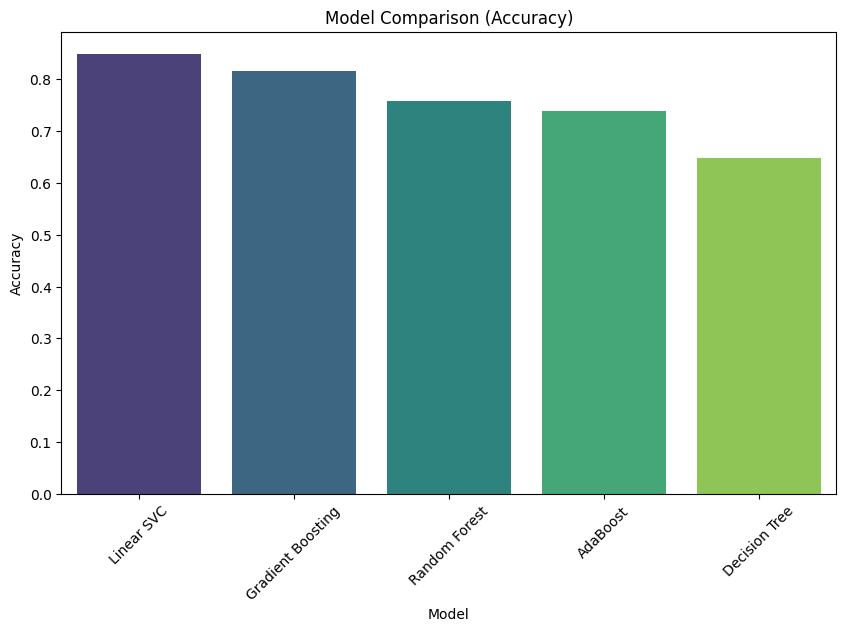

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=results_df,
    x="Model",
    y="Accuracy",
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Model Comparison (Accuracy)")
plt.show()

Best model: Linear SVC


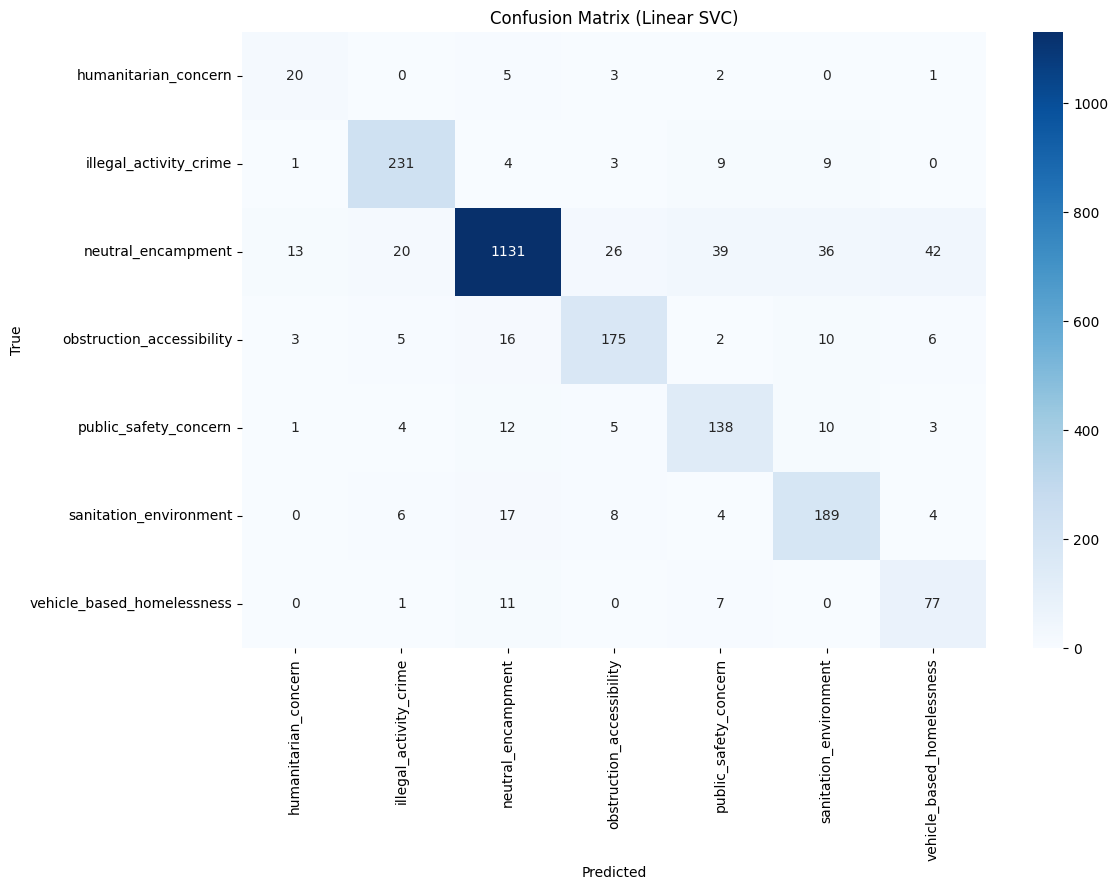

In [67]:
from sklearn.metrics import confusion_matrix

best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("Best model:", best_model_name)


y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
labels = sorted(list(set(y_test)))

plt.figure(figsize=(12, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix ({best_model_name})")
plt.show()

In [81]:
# from simpletransformers.classification import ClassificationModel, ClassificationArgs
# from sklearn.metrics import f1_score, accuracy_score

# df_train = df_sample.copy()
# df_train = df_train.rename(columns={"clean_text_for_sentiment": "text", "sentiment_7cat": "labels"})

# # Build label mapping
# unique_labels = sorted(df_train["labels"].unique())
# label_mapping = {label: i for i, label in enumerate(unique_labels)}
# inv_label_mapping = {v: k for k, v in label_mapping.items()}

# df_train["labels"] = df_train["labels"].map(label_mapping)


# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train["labels"])

# model_args = ClassificationArgs(
#     num_train_epochs=3,
#     train_batch_size=16,
#     eval_batch_size=16,
#     overwrite_output_dir=True,
#     use_early_stopping=True,
#     early_stopping_patience=2,
#     manual_seed=22,
#     save_model_every_epoch=False
# )

# model = ClassificationModel(
#     "xlmroberta", 
#     "xlm-roberta-base",
#     num_labels=len(unique_labels),
#     args=model_args,
#     use_cuda=False
# )

# model.train_model(train_df)


# def f1_multiclass(labels, preds):
#     return f1_score(labels, preds, average='macro')

# result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)
# print(result)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\simpletransformers\classification\classification_model.py:484: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  warnings.warn(
Epoch 3 of 3: 100%|██████████| 3/3 [2:41:42<00:00, 3234.30s/it]
5it [00:14,  2.97s/it]                       
Running Evaluation: 100%|██████████| 145/145 [03:04<00:00,  1.27s/it]

{'mcc': 0.9818758688634046, 'f1': 0.982049209957687, 'acc': 0.9883066262451278, 'eval_loss': 0.055349044128851}


In [82]:
texts = test_df["text"].tolist()
predictions, raw_outputs = model.predict(texts)

test_df["predict"] = predictions
test_df["correct"] = (test_df["labels"] == test_df["predict"]).astype(int)

inv_label_map = {v: k for k, v in label_mapping.items()}
test_df["true_label"] = test_df["labels"].map(inv_label_map)
test_df["predict_label"] = test_df["predict"].map(inv_label_map)

print("Example Predictions:")
print(test_df[["text", "true_label", "predict_label", "correct"]].head(10))

5it [00:06,  1.25s/it]                       
100%|██████████| 145/145 [03:04<00:00,  1.27s/it]

Example Predictions:
                                                     text  \
116639                 Illegally parked oversized vehicle   
236843  Motor Home Being Stored on Street. It?s been h...   
44713   Jerry Miller the dirtbag drug addict thief and...   
143903  drug and prostitution activity, camp inside a ...   
151352      Homeless encampments blocking sidewalk access   
140706  All day long hard drug usage for days on end. ...   
150229  Homeless encampment with a fire. The fire has ...   
112492  Homeless on sidewalk , she don?t want to move ...   
171039                                         Encampment   
138593                                         Encampment   

                       true_label              predict_label  correct  
116639     illegal_activity_crime     illegal_activity_crime        1  
236843         neutral_encampment         neutral_encampment        1  
44713      illegal_activity_crime     illegal_activity_crime        1  
143903     illegal_

Accuracy: 0.9883

Classification Report:
                            precision    recall  f1-score   support

      humanitarian_concern       0.94      1.00      0.97        31
    illegal_activity_crime       1.00      0.99      0.99       257
        neutral_encampment       0.99      0.99      0.99      1307
 obstruction_accessibility       0.98      1.00      0.99       217
     public_safety_concern       0.97      0.99      0.98       173
    sanitation_environment       1.00      0.99      1.00       228
vehicle_based_homelessness       0.93      0.99      0.96        96

                  accuracy                           0.99      2309
                 macro avg       0.97      0.99      0.98      2309
              weighted avg       0.99      0.99      0.99      2309



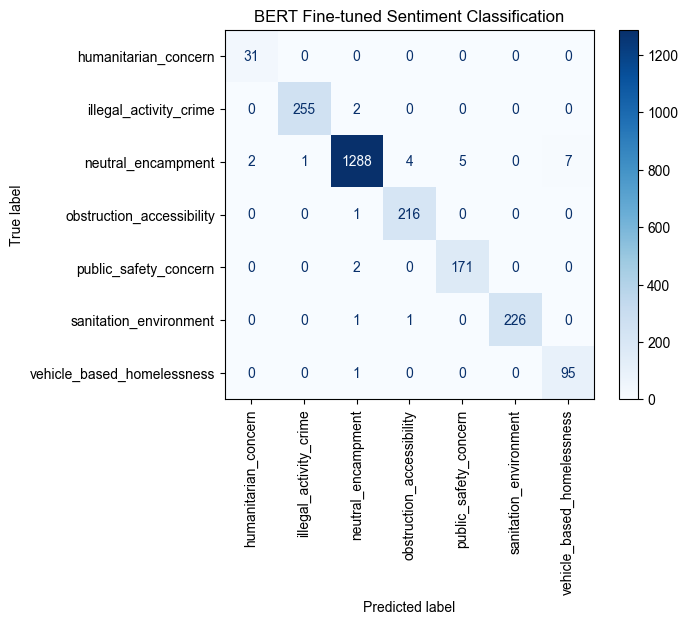

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
acc = test_df["correct"].mean()
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(test_df["labels"], test_df["predict"], target_names=list(label_mapping.keys())))

cm = confusion_matrix(test_df["labels"], test_df["predict"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("BERT Fine-tuned Sentiment Classification")
plt.show()

In [84]:
test_df['correct'].value_counts()

correct
1    2282
0      27
Name: count, dtype: int64

In [85]:
texts = df_sample["clean_text_for_sentiment"].dropna().tolist()
predictions, raw_outputs = model.predict(texts)

df_sample["predicted_label"] = predictions

inv_label_map = {v: k for k, v in label_mapping.items()}
df_sample["predicted_label_text"] = df_sample["predicted_label"].map(inv_label_map)

print(df_sample["predicted_label_text"].value_counts())

24it [00:24,  1.02s/it]                        
100%|██████████| 722/722 [12:58<00:00,  1.08s/it]

predicted_label_text
neutral_encampment            6527
illegal_activity_crime        1278
sanitation_environment        1132
obstruction_accessibility     1090
public_safety_concern          864
vehicle_based_homelessness     494
humanitarian_concern           160
Name: count, dtype: int64


In [86]:
# save to csv
# df_sample.to_csv("sentiment_analysis_7cat.csv", index=False)

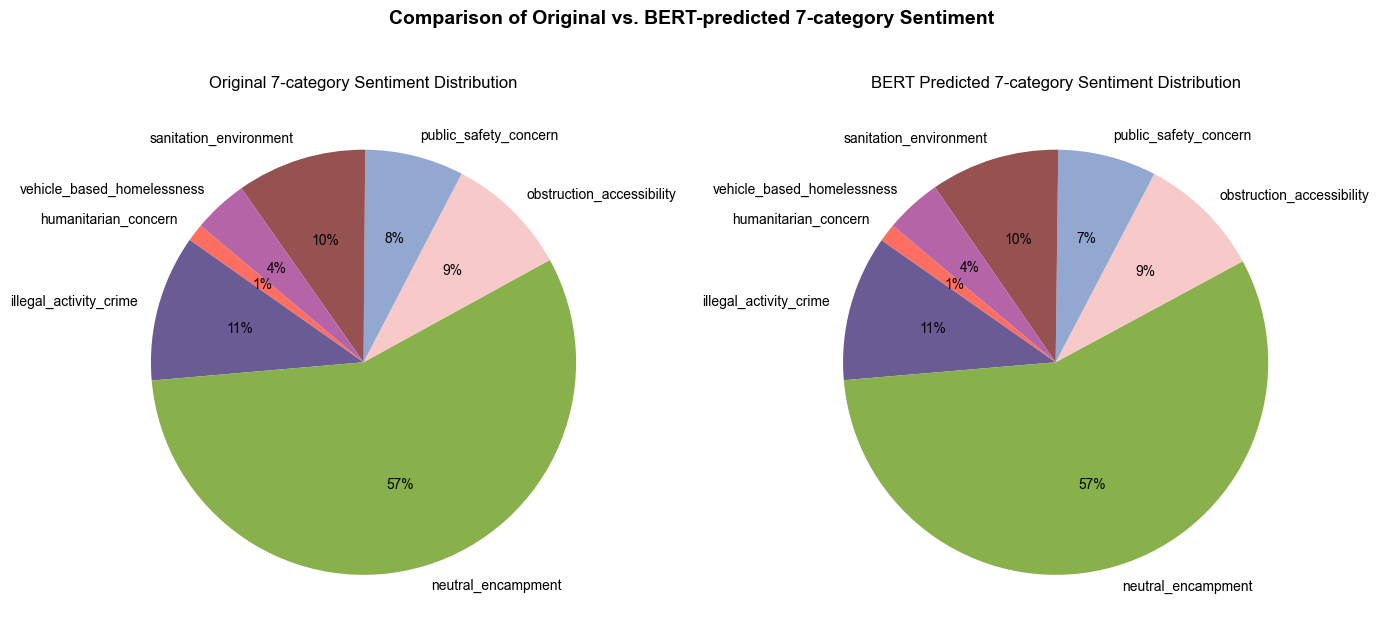

In [90]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False

label_order = ["humanitarian_concern", "illegal_activity_crime", "neutral_encampment", 
               "obstruction_accessibility", "public_safety_concern", "sanitation_environment", "vehicle_based_homelessness"]

colors = ["#FF6F61",  "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251", "#B565A7"]

true_counts = df_sample["sentiment_7cat"].value_counts().reindex(label_order, fill_value=0)
true_labels = true_counts.index.tolist()
true_sizes = true_counts.tolist()

pred_counts = df_sample["predicted_label_text"].value_counts().reindex(label_order, fill_value=0)
pred_labels = pred_counts.index.tolist()
pred_sizes = pred_counts.tolist()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(true_sizes, labels=true_labels, autopct='%1.0f%%', startangle=140, colors=colors)
axes[0].set_title("Original 7-category Sentiment Distribution", fontsize=12)

axes[1].pie(pred_sizes, labels=pred_labels, autopct='%1.0f%%', startangle=140, colors=colors)
axes[1].set_title("BERT Predicted 7-category Sentiment Distribution", fontsize=12)

plt.suptitle("Comparison of Original vs. BERT-predicted 7-category Sentiment",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("Comparison of Original vs. BERT-predicted 7-category Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# texts_all = df_sentiment["clean_text_for_sentiment"].dropna().tolist()

# predictions, raw_outputs = model.predict(texts_all)

# df_sentiment["predicted_label"] = predictions

In [ ]:
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
# inv_label_map = {v: k for k, v in label_mapping.items()}

# df_sentiment["predicted_label_text"] = df_sentiment["predicted_label"].map(inv_label_map)

# print(df_sentiment["predicted_label_text"].value_counts())

In [ ]:
# df_sentiment.to_csv("all_years_311_with_bert_predictions_7cat.csv", index=False, encoding="utf-8-sig")

### (1) TextBlob

In [143]:
# from textblob import TextBlob

# def get_textblob_sentiment(score):
#     if score is None:
#         return None
#     elif score > 0.05:
#         return "positive"
#     elif score < -0.05:
#         return "negative"
#     else:
#         return "neutral"

# df_sample["textblob_polarity"] = df_sample["clean_text_for_sentiment"].apply(lambda x: TextBlob(x).sentiment.polarity)
# df_sample["sentiment_textblob"] = df_sample["textblob_polarity"].apply(get_textblob_sentiment)

# print(df_sample[["clean_text_for_sentiment", "textblob_polarity", "sentiment_textblob"]].head())
# print(df_sample["sentiment_textblob"].value_counts(dropna=False))

                                 clean_text_for_sentiment  textblob_polarity  \
102231    Aggressive homeless man approaching pedestrians            0.00000   
34277   The gate on the 2nd Ave bridge nearest Date do...            0.10873   
185168        Homeless encampment at adams ave rec center           -0.10000   
141137      Encampment is growing . Nothing done about it            0.00000   
127635            Encampment on sidewal. Trash in canyon/            0.00000   

       sentiment_textblob  
102231            neutral  
34277            positive  
185168           negative  
141137            neutral  
127635            neutral  
sentiment_textblob
neutral     7704
negative    2069
positive    1772
Name: count, dtype: int64


### (2) VADER 

In [144]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()

# def get_VADER_sentiment(score):
#     if score is None:
#         return None
#     elif score > 0.05:
#         return "positive"
#     elif score < -0.05:
#         return "negative"
#     else:
#         return "neutral"

# df_sample["VADER_polarity"] = df_sample["clean_text_for_sentiment"].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# df_sample["sentiment_VADER"] = df_sample["VADER_polarity"].apply(get_VADER_sentiment)

# print(df_sample[["clean_text_for_sentiment", "VADER_polarity", "sentiment_VADER"]].head())
# print(df_sample["sentiment_VADER"].value_counts(dropna=False))

                                 clean_text_for_sentiment  VADER_polarity  \
102231    Aggressive homeless man approaching pedestrians         -0.1531   
34277   The gate on the 2nd Ave bridge nearest Date do...          0.8442   
185168        Homeless encampment at adams ave rec center          0.0000   
141137      Encampment is growing . Nothing done about it          0.1779   
127635            Encampment on sidewal. Trash in canyon/          0.0000   

       sentiment_VADER  
102231        negative  
34277         positive  
185168         neutral  
141137        positive  
127635         neutral  
sentiment_VADER
neutral     6315
negative    3681
positive    1549
Name: count, dtype: int64


### (3) Pattern

In [145]:
# from pattern.en import sentiment

# def get_pattern_sentiment(score):
#     if score is None:
#         return None
#     elif score > 0.05:
#         return "positive"
#     elif score < -0.05:
#         return "negative"
#     else:
#         return "neutral"

# df_sample["pattern_polarity"] = df_sample["clean_text_for_sentiment"].apply(lambda x: sentiment(x)[0])
# df_sample["sentiment_pattern"] = df_sample["pattern_polarity"].apply(get_pattern_sentiment)

# print(df_sample[["clean_text_for_sentiment", "pattern_polarity", "sentiment_pattern"]].head())
# print(df_sample["sentiment_pattern"].value_counts(dropna=False))

                                 clean_text_for_sentiment  pattern_polarity  \
102231    Aggressive homeless man approaching pedestrians           0.00000   
34277   The gate on the 2nd Ave bridge nearest Date do...           0.10873   
185168        Homeless encampment at adams ave rec center          -0.10000   
141137      Encampment is growing . Nothing done about it           0.00000   
127635            Encampment on sidewal. Trash in canyon/           0.00000   

       sentiment_pattern  
102231           neutral  
34277           positive  
185168          negative  
141137           neutral  
127635           neutral  
sentiment_pattern
neutral     7704
negative    2071
positive    1770
Name: count, dtype: int64


### (4) Stanza

In [146]:
# import stanza
# from tqdm import tqdm

# nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

# def get_stanza_score_majority(text):
#     doc = nlp(text)
#     sentiments = [s.sentiment for s in doc.sentences]
#     most_common = Counter(sentiments).most_common(1)[0][0]
#     return most_common

# def map_stanza_sentiment(score):
#     if score == 0:
#         return "negative"
#     elif score == 1:
#         return "neutral"
#     elif score == 2:
#         return "positive"
#     else:
#         return None

# tqdm.pandas()

# df_sample["stanza_score"] = df_sample["clean_text_for_sentiment"].progress_apply(get_stanza_score_majority)
# df_sample["sentiment_stanza"] = df_sample["stanza_score"].apply(map_stanza_sentiment)

# print(df_sample[["clean_text_for_sentiment", "stanza_score", "sentiment_stanza"]].head())
# print(df_sample["sentiment_stanza"].value_counts(dropna=False))

2025-11-09 18:24:13 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-11-09 18:24:13 INFO: Downloaded file to C:\Users\User\stanza_resources\resources.json
2025-11-09 18:24:13 WARNING: Language en package default expects mwt, which has been added
2025-11-09 18:24:14 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | combined       |
| mwt       | combined       |
| sentiment | sstplus_charlm |

2025-11-09 18:24:14 INFO: Using device: cpu
2025-11-09 18:24:14 INFO: Loading: tokenize
2025-11-09 18:24:14 INFO: Loading: mwt
2025-11-09 18:24:14 INFO: Loading: sentiment
2025-11-09 18:24:16 INFO: Done loading processors!
100%|██████████| 11545/11545 [23:46<00:00,  8.09it/s] 

                                 clean_text_for_sentiment  stanza_score  \
102231    Aggressive homeless man approaching pedestrians             1   
34277   The gate on the 2nd Ave bridge nearest Date do...             1   
185168        Homeless encampment at adams ave rec center             1   
141137      Encampment is growing . Nothing done about it             1   
127635            Encampment on sidewal. Trash in canyon/             1   

       sentiment_stanza  
102231          neutral  
34277           neutral  
185168          neutral  
141137          neutral  
127635          neutral  
sentiment_stanza
neutral     8451
negative    2969
positive     125
Name: count, dtype: int64


### (5) PysentiLM

In [147]:
# import pysentiment2 as ps
# from tqdm import tqdm

# hiv4 = ps.HIV4()

# def get_pysentiment_polarity(text):
#     tokens = hiv4.tokenize(text)
#     score = hiv4.get_score(tokens)
#     return score["Polarity"]

# def map_pysentiment_label(score):
#     if score is None:
#         return None
#     elif score > 0.05:
#         return "positive"
#     elif score < -0.05:
#         return "negative"
#     else:
#         return "neutral"


# tqdm.pandas()
# df_sample["pysentiment_polarity"] = df_sample["clean_text_for_sentiment"].progress_apply(get_pysentiment_polarity)
# df_sample["sentiment_pysentiment"] = df_sample["pysentiment_polarity"].apply(map_pysentiment_label)

# print(df_sample[["clean_text_for_sentiment", "pysentiment_polarity", "sentiment_pysentiment"]].head())
# print(df_sample["sentiment_pysentiment"].value_counts(dropna=False))

100%|██████████| 11545/11545 [00:02<00:00, 4378.35it/s]


                                 clean_text_for_sentiment  \
102231    Aggressive homeless man approaching pedestrians   
34277   The gate on the 2nd Ave bridge nearest Date do...   
185168        Homeless encampment at adams ave rec center   
141137      Encampment is growing . Nothing done about it   
127635            Encampment on sidewal. Trash in canyon/   

        pysentiment_polarity sentiment_pysentiment  
102231                   0.0               neutral  
34277                    1.0              positive  
185168                   0.0               neutral  
141137                   0.0               neutral  
127635                   0.0               neutral  
sentiment_pysentiment
neutral     6221
negative    3298
positive    2026
Name: count, dtype: int64


### Vote

In [148]:
# df_sample["stanza_score"] = df_sample["stanza_score"]-1

In [149]:
# label_cols = [
#     "sentiment_textblob",
#     "sentiment_VADER",
#     "sentiment_pattern",
#     "sentiment_stanza",
#     "sentiment_pysentiment"
# ]

# score_cols = [
#     "textblob_polarity",
#     "VADER_polarity",
#     "pattern_polarity",
#     "stanza_score",           
#     "pysentiment_polarity"
# ]

# def vote_sentiment(row):
#     label_votes = [row[col] for col in label_cols if pd.notnull(row[col])]
#     count = Counter(label_votes)
#     most_common_label, freq = count.most_common(1)[0]

#     if freq >= 3:
#         final_label = most_common_label
#         quality = "high"

#     else:
#         numeric_scores = [row[col] for col in score_cols if pd.notnull(row[col])]
#         avg_score = np.mean(numeric_scores)

#         if avg_score > 0.05:
#             final_label = "positive"
#         elif avg_score < -0.05:
#             final_label = "negative"
#         else:
#             final_label = "neutral"

#         quality = "low"

#     return pd.Series([final_label, quality])

# df_sample[["final_sentiment", "label_quality"]] = df_sample.apply(vote_sentiment, axis=1)

In [150]:
# print(df_sample["final_sentiment"].value_counts(dropna=False))
# print(df_sample["label_quality"].value_counts(dropna=False))

final_sentiment
neutral     7730
negative    2710
positive    1105
Name: count, dtype: int64
label_quality
high    10552
low       993
Name: count, dtype: int64


In [151]:
# sentiment_rename = {
#     "positive": "request",
#     "neutral": "report",
#     "negative": "complaint"
# }

# df_sample["final_label"] = df_sample["final_sentiment"].map(sentiment_rename)
# print(df_sample["final_label"].value_counts(dropna=False))

final_label
report       7730
complaint    2710
request      1105
Name: count, dtype: int64


In [152]:
# save to csv
# df_sample.to_csv("sentiment_analysis.csv", index=False)

### Machine Learning

In [159]:
# from sentence_transformers import SentenceTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score

# df_train = df_sample[df_sample["label_quality"] == "high"].copy()
# X_text = df_train["clean_text_for_sentiment"].tolist()
# y = df_train["final_sentiment"].tolist()

# model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
# X_embeddings = model.encode(X_text, show_progress_bar=True)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_embeddings, y, test_size=0.2, random_state=42, stratify=y
# )

# models = {
#     "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
#     "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
#     "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "Linear SVC": LinearSVC(random_state=42, class_weight="balanced")
# }


# results = []
# for name, clf in models.items():
#     print(f"Training {name} ...")
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, y_pred))
#     results.append({"Model": name, "Accuracy": acc})


# results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
# print(results_df)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 1ffe0368-2eaf-4846-8178-e6c403a5cc83)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 330/330 [00:21<00:00, 15.64it/s]



🔹 Training Decision Tree ...
Decision Tree Accuracy: 0.6694
              precision    recall  f1-score   support

    negative       0.39      0.40      0.39       426
     neutral       0.80      0.80      0.80      1503
    positive       0.23      0.21      0.22       182

    accuracy                           0.67      2111
   macro avg       0.47      0.47      0.47      2111
weighted avg       0.67      0.67      0.67      2111


🔹 Training Random Forest ...
Random Forest Accuracy: 0.7613
              precision    recall  f1-score   support

    negative       0.74      0.30      0.43       426
     neutral       0.76      0.98      0.86      1503
    positive       0.62      0.04      0.08       182

    accuracy                           0.76      2111
   macro avg       0.71      0.44      0.46      2111
weighted avg       0.75      0.76      0.70      2111


🔹 Training AdaBoost ...
AdaBoost Accuracy: 0.7608
              precision    recall  f1-score   support

    negati

### Pretrain model: Bert

In [160]:
# from simpletransformers.classification import ClassificationModel, ClassificationArgs
# from sklearn.metrics import f1_score, accuracy_score
# import pandas as pd

# train = df_sample[df_sample["label_quality"] == "high"].copy()
# train = train.rename(columns={"clean_text_for_sentiment": "text", "final_sentiment": "labels"})

# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
# train["labels"] = train["labels"].map(label_mapping)

# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(train, test_size=0.2, random_state=42, stratify=train["labels"])


# model_args = ClassificationArgs()
# model_args.num_train_epochs = 3
# model_args.overwrite_output_dir = True
# model_args.train_batch_size = 16
# model_args.eval_batch_size = 16
# model_args.manual_seed = 22
# model_args.use_early_stopping = True
# model_args.early_stopping_patience = 2
# model_args.save_model_every_epoch = False


# model = ClassificationModel(
#     "bert", 
#     "bert-base-uncased",  
#     num_labels=len(label_mapping),
#     args=model_args,
#     use_cuda=False  
# )

# model.train_model(train_df)


# def f1_multiclass(labels, preds):
#     return f1_score(labels, preds, average='macro')

# result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)
# print(result)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: a07afc46-285b-47b5-af7d-dd4f43eac83b)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please 

{'mcc': 0.7077665318878278, 'f1': 0.799208178589882, 'acc': 0.8706774040738986, 'eval_loss': 0.4427818850169636}


In [161]:
# texts = test_df["text"].tolist()
# predictions, raw_outputs = model.predict(texts)

# test_df["predict"] = predictions
# test_df["correct"] = (test_df["labels"] == test_df["predict"]).astype(int)

# inv_label_map = {v: k for k, v in label_mapping.items()}
# test_df["true_label"] = test_df["labels"].map(inv_label_map)
# test_df["predict_label"] = test_df["predict"].map(inv_label_map)

# print("Example Predictions:")
# print(test_df[["text", "true_label", "predict_label", "correct"]].head(10))

5it [00:05,  1.18s/it]                       
100%|██████████| 132/132 [01:58<00:00,  1.12it/s]


🔍 Example Predictions:
                                                     text true_label  \
51244                                     Huge camp again   positive   
36993                                       Homeless camp    neutral   
203059  Homeless encampment. Ford Evonoljne RV, CA Lic...   negative   
1424    I have lived at 4775 Del Monte Ave for 20+ yea...    neutral   
208777  People living under the balboa (cabrillo) brid...    neutral   
119023                People living in rv , noise , trash    neutral   
176566           Group loitering/camped at 1136 C Street.    neutral   
83175                                      rv encampments    neutral   
148080  Guy living in Gray suburban . Has been there f...    neutral   
45785   Homeless encampment on MLK Bike path South sid...    neutral   

       predict_label  correct  
51244       positive        1  
36993        neutral        1  
203059      negative        1  
1424        negative        0  
208777       neutral   

Accuracy: 0.8707

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.79      0.78       426
     neutral       0.92      0.92      0.92      1503
    positive       0.75      0.66      0.71       182

    accuracy                           0.87      2111
   macro avg       0.81      0.79      0.80      2111
weighted avg       0.87      0.87      0.87      2111



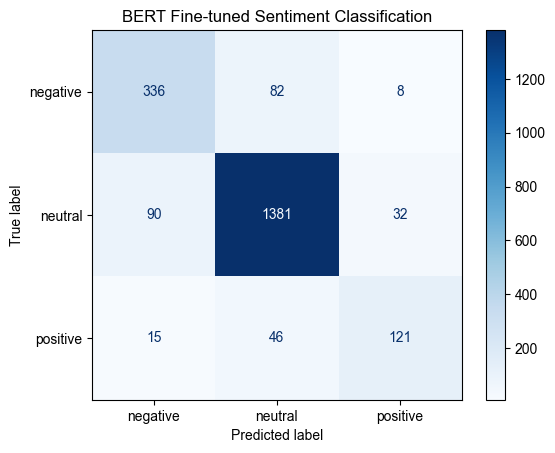

In [164]:
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
# acc = test_df["correct"].mean()
# print(f"Accuracy: {acc:.4f}")

# print("\nClassification Report:")
# print(classification_report(test_df["labels"], test_df["predict"], target_names=list(label_mapping.keys())))

# cm = confusion_matrix(test_df["labels"], test_df["predict"])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
# disp.plot(cmap=plt.cm.Blues)
# plt.title("BERT Fine-tuned Sentiment Classification")
# plt.show()

In [166]:
test_df['correct'].value_counts()

correct
1    1838
0     273
Name: count, dtype: int64

In [167]:
# texts = df_sample["clean_text_for_sentiment"].dropna().tolist()
# predictions, raw_outputs = model.predict(texts)

# df_sample["predicted_label"] = predictions

# inv_label_map = {v: k for k, v in label_mapping.items()}
# df_sample["predicted_label_text"] = df_sample["predicted_label"].map(inv_label_map)

# print(df_sample["predicted_label_text"].value_counts())

24it [00:24,  1.02s/it]                       
100%|██████████| 722/722 [17:52<00:00,  1.48s/it]

predicted_label_text
neutral     8019
negative    2430
positive    1096
Name: count, dtype: int64


In [168]:
# save to csv
# df_sample.to_csv("sentiment_analysis.csv", index=False)

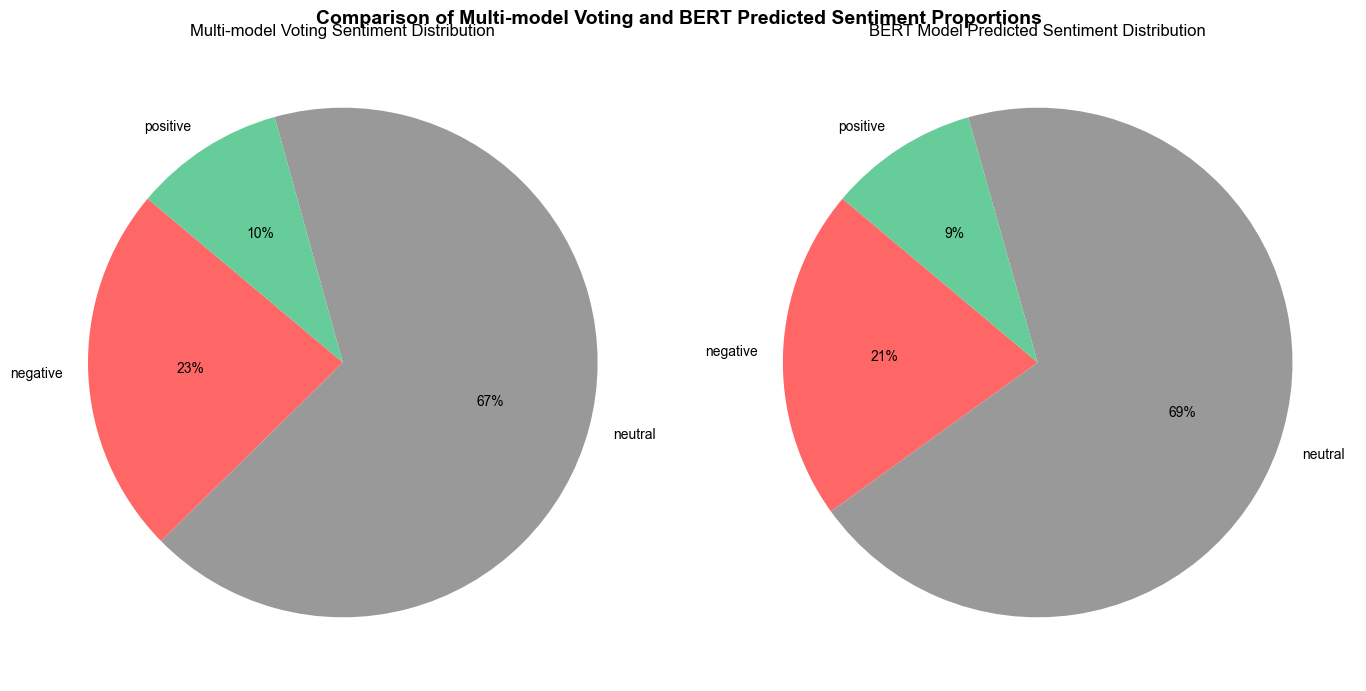

In [172]:
# plt.rcParams["font.family"] = "Arial"
# plt.rcParams["axes.unicode_minus"] = False

# label_order = ["negative", "neutral", "positive"]
# colors = ["#FF6666", "#999999", "#66CC99"]

# true_counts = df_sample["final_sentiment"].value_counts().reindex(label_order, fill_value=0)
# true_labels = true_counts.index.tolist()
# true_sizes = true_counts.tolist()

# pred_counts = df_sample["predicted_label_text"].value_counts().reindex(label_order, fill_value=0)
# pred_labels = pred_counts.index.tolist()
# pred_sizes = pred_counts.tolist()

# fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# axes[0].pie(true_sizes, labels=true_labels, autopct='%1.0f%%', startangle=140, colors=colors)
# axes[0].set_title("Multi-model Voting Sentiment Distribution", fontsize=12)

# axes[1].pie(pred_sizes, labels=pred_labels, autopct='%1.0f%%', startangle=140, colors=colors)
# axes[1].set_title("BERT Model Predicted Sentiment Distribution", fontsize=12)

# plt.suptitle("Comparison of Multi-model Voting and BERT Predicted Sentiment Proportions",
#              fontsize=14, fontweight="bold")
# plt.tight_layout()
# plt.savefig("Comparison_of_Voting_and_BERT_Sentiment_Proportions.png", dpi=300, bbox_inches='tight')
# plt.show()

In [173]:
# texts_all = df_sentiment["clean_text_for_sentiment"].dropna().tolist()

# predictions, raw_outputs = model.predict(texts_all)

# df_sentiment["predicted_label"] = predictions

462it [00:21, 21.07it/s]                         
100%|██████████| 14432/14432 [13:40:58<00:00,  3.41s/it]      


In [174]:
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
# inv_label_map = {v: k for k, v in label_mapping.items()}

# df_sentiment["predicted_label_text"] = df_sentiment["predicted_label"].map(inv_label_map)

# print(df_sentiment["predicted_label_text"].value_counts())

predicted_label_text
neutral     162401
negative     47753
positive     20746
Name: count, dtype: int64


In [175]:
# df_sentiment.to_csv("all_years_311_with_bert_predictions.csv", index=False, encoding="utf-8-sig")

## 4. Descriptive Statistics: Bag of words: Count of every word

In [162]:
data_concat.shape

(230900, 31)

### (1) Words Count

In [ ]:
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [187]:
word_freq_dict = {}

all_text = " ".join(data_concat["clean_text"])
tokens = word_tokenize(all_text)
word_freq = Counter(tokens)
freq_df = pd.DataFrame(word_freq.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

print(len(freq_df))

49995


In [189]:
print("=== Top 50 Words ===")
print(freq_df.head(50).to_string(index=False))

=== Top 50 Words ===
       word  count
        the 148178
        and 118843
   homeless  99760
 encampment  83170
         of  75130
         in  72159
         on  70743
         to  59978
          a  55898
         is  50197
       this  33159
        for  31456
         at  28456
   sidewalk  27885
     street  26996
       with  26524
        are  26378
        has  25382
       been  24844
      trash  24139
      there  23640
     people  22323
       they  19800
       have  18613
encampments  17494
         it  17451
       camp  16633
     living  16296
         up  15955
   blocking  15881
       from  15697
       park  15546
     parked  14057
          i  13723
       over  13497
     please  13160
       side  13122
        out  13077
    parking  12720
       area  12572
         by  12242
       that  12123
    camping  11545
        not  11234
    between  10963
       fire  10954
        our  10880
       here  10721
        all  10394
         st  10170


In [194]:
from nltk.corpus import stopwords

nltk.data.path.append(r'C:\Users\User\Desktop\UCSD\2. UCSD CSS Fall 2025\Capstone project')
stop_words = set(stopwords.words('english'))

print(len(stop_words))
print(list(stop_words)[:20])

198
['am', "don't", 'couldn', 'few', "shouldn't", 'your', 'myself', 'each', 'mustn', 'once', 'me', 'they', 'there', 'we', 'should', 'i', 'what', 'doing', "you'd", "didn't"]


In [271]:
all_text = " ".join(data_concat["clean_text"])
tokens = word_tokenize(all_text)
tokens = [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]
word_freq = Counter(tokens)
freq_df = (
    pd.DataFrame(word_freq.items(), columns=["word", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
    )

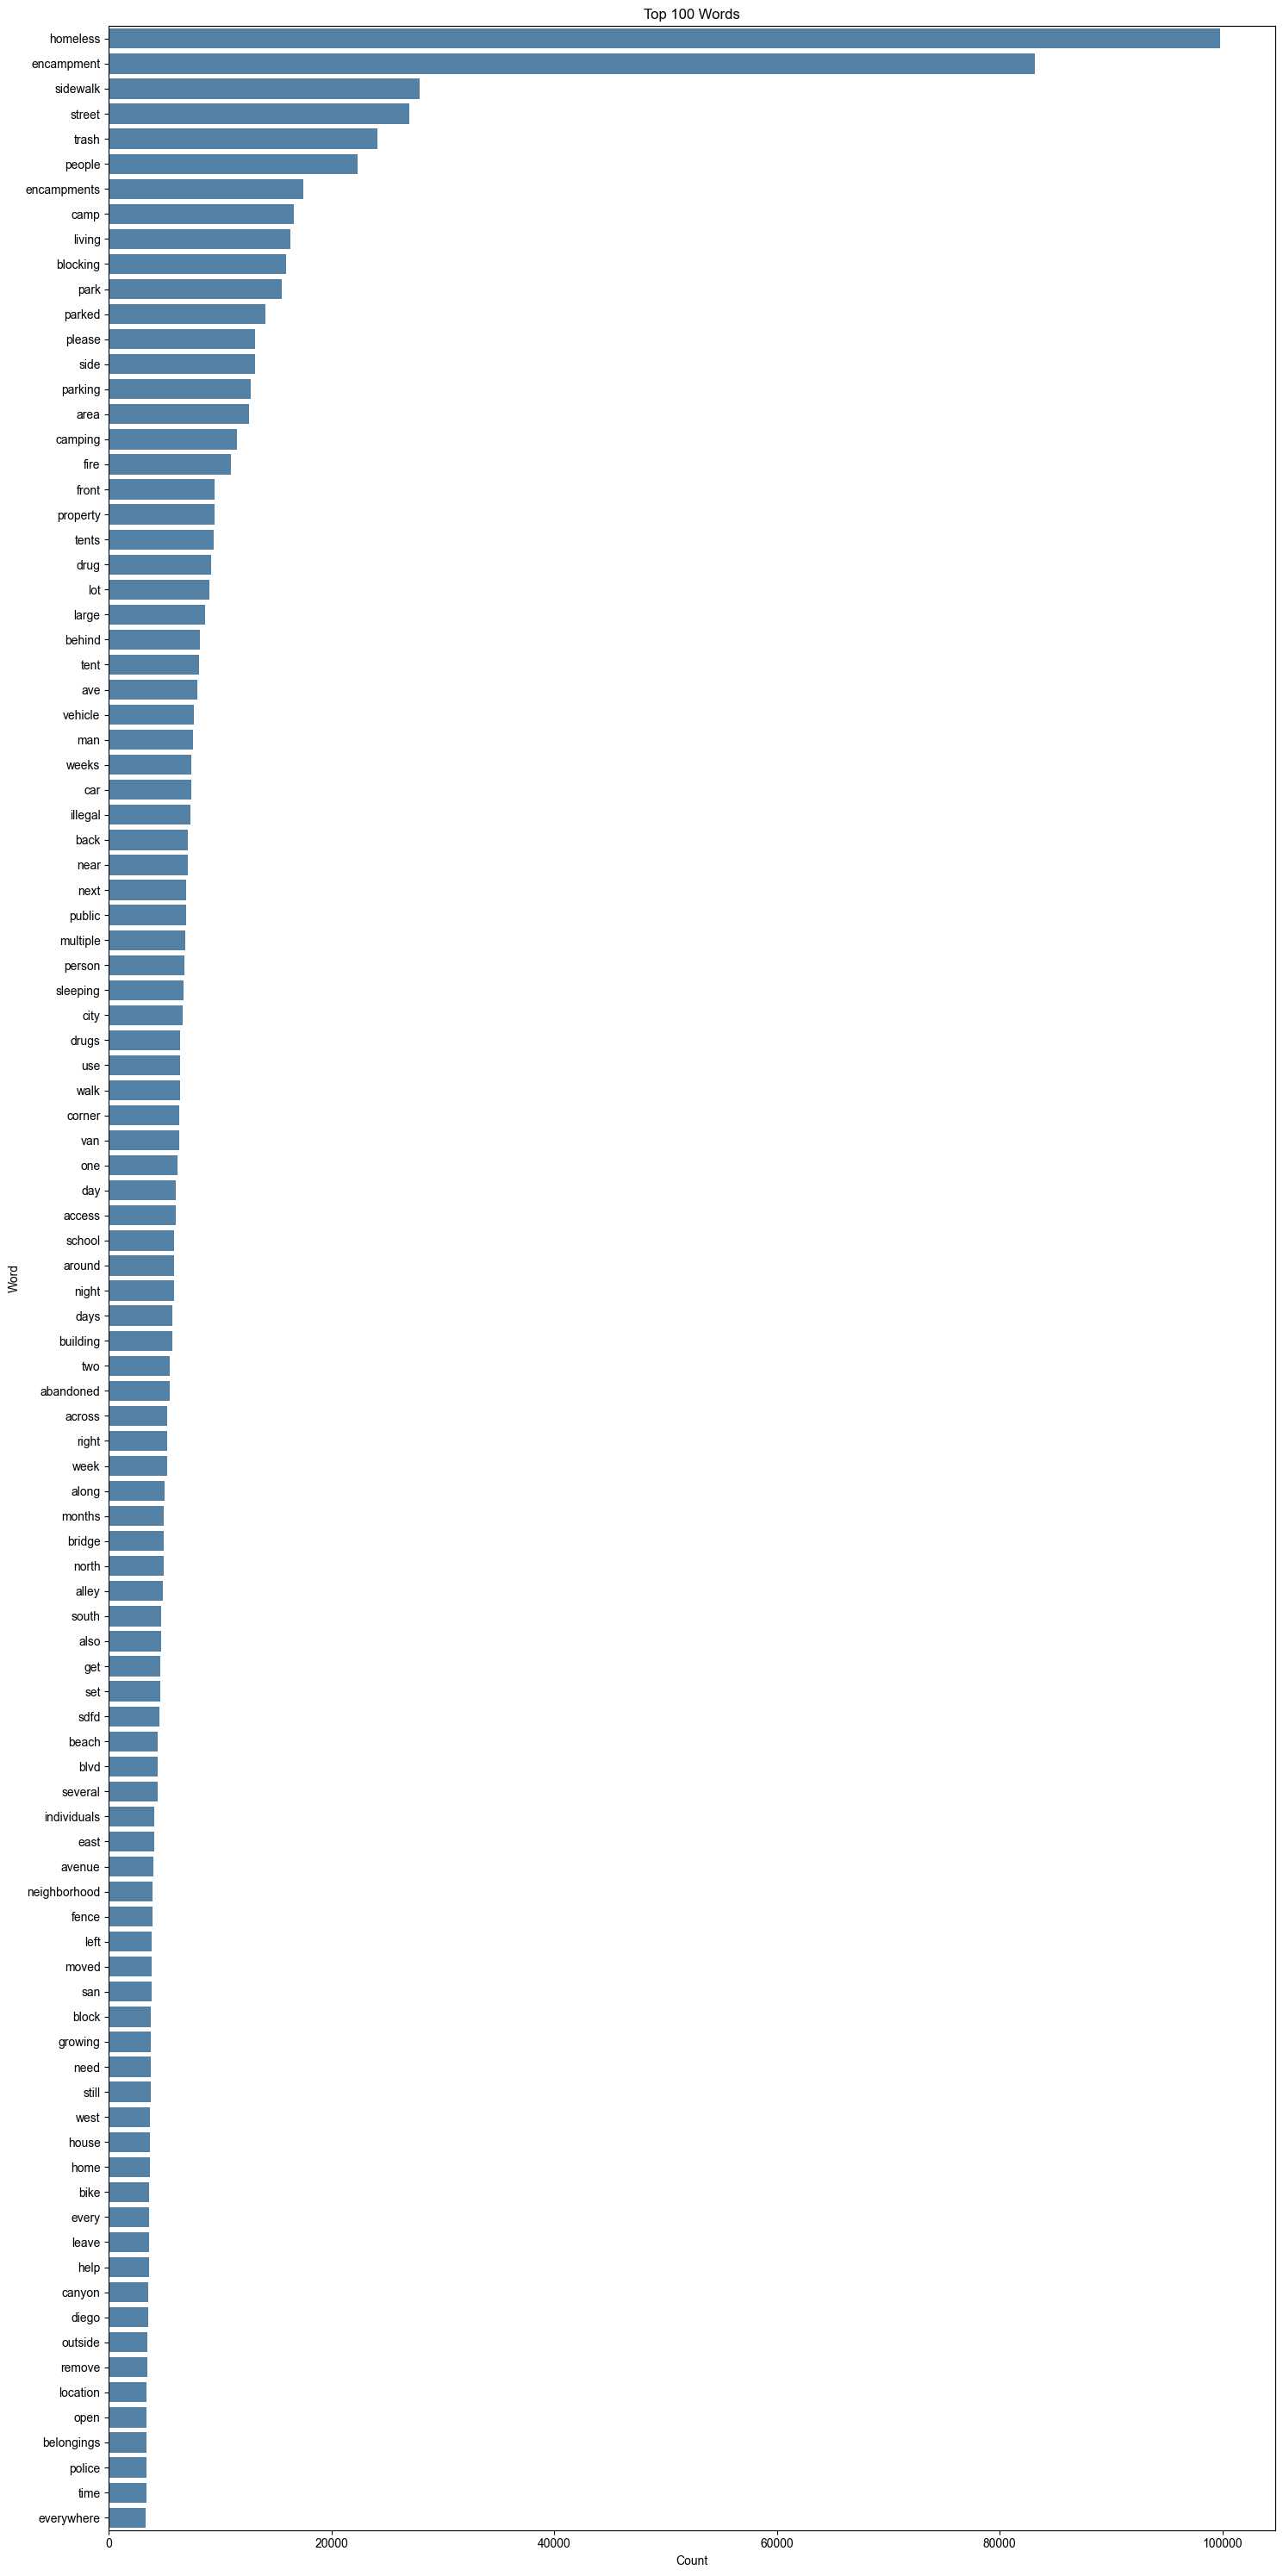

In [272]:
plt.figure(figsize=(15,30))
sns.barplot(data=freq_df.head(100), x="count", y="word", color="steelblue")
plt.title(f"Top 100 Words")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.savefig("Top 100 Words.png", dpi=300, bbox_inches='tight')
plt.show()

### (2) N-gram

In [273]:
bigram_freq_dict = {}

all_text = " ".join(data_concat["clean_text"])
tokens = word_tokenize(all_text)
tokens = [w.lower() for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)

freq_df = (
    pd.DataFrame(bigram_freq.items(), columns=["bigram", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
    )
    

freq_df["bigram"] = freq_df["bigram"].apply(lambda x: " ".join(x))
    
bigram_freq_dict[year] = freq_df
len(freq_df)

592333

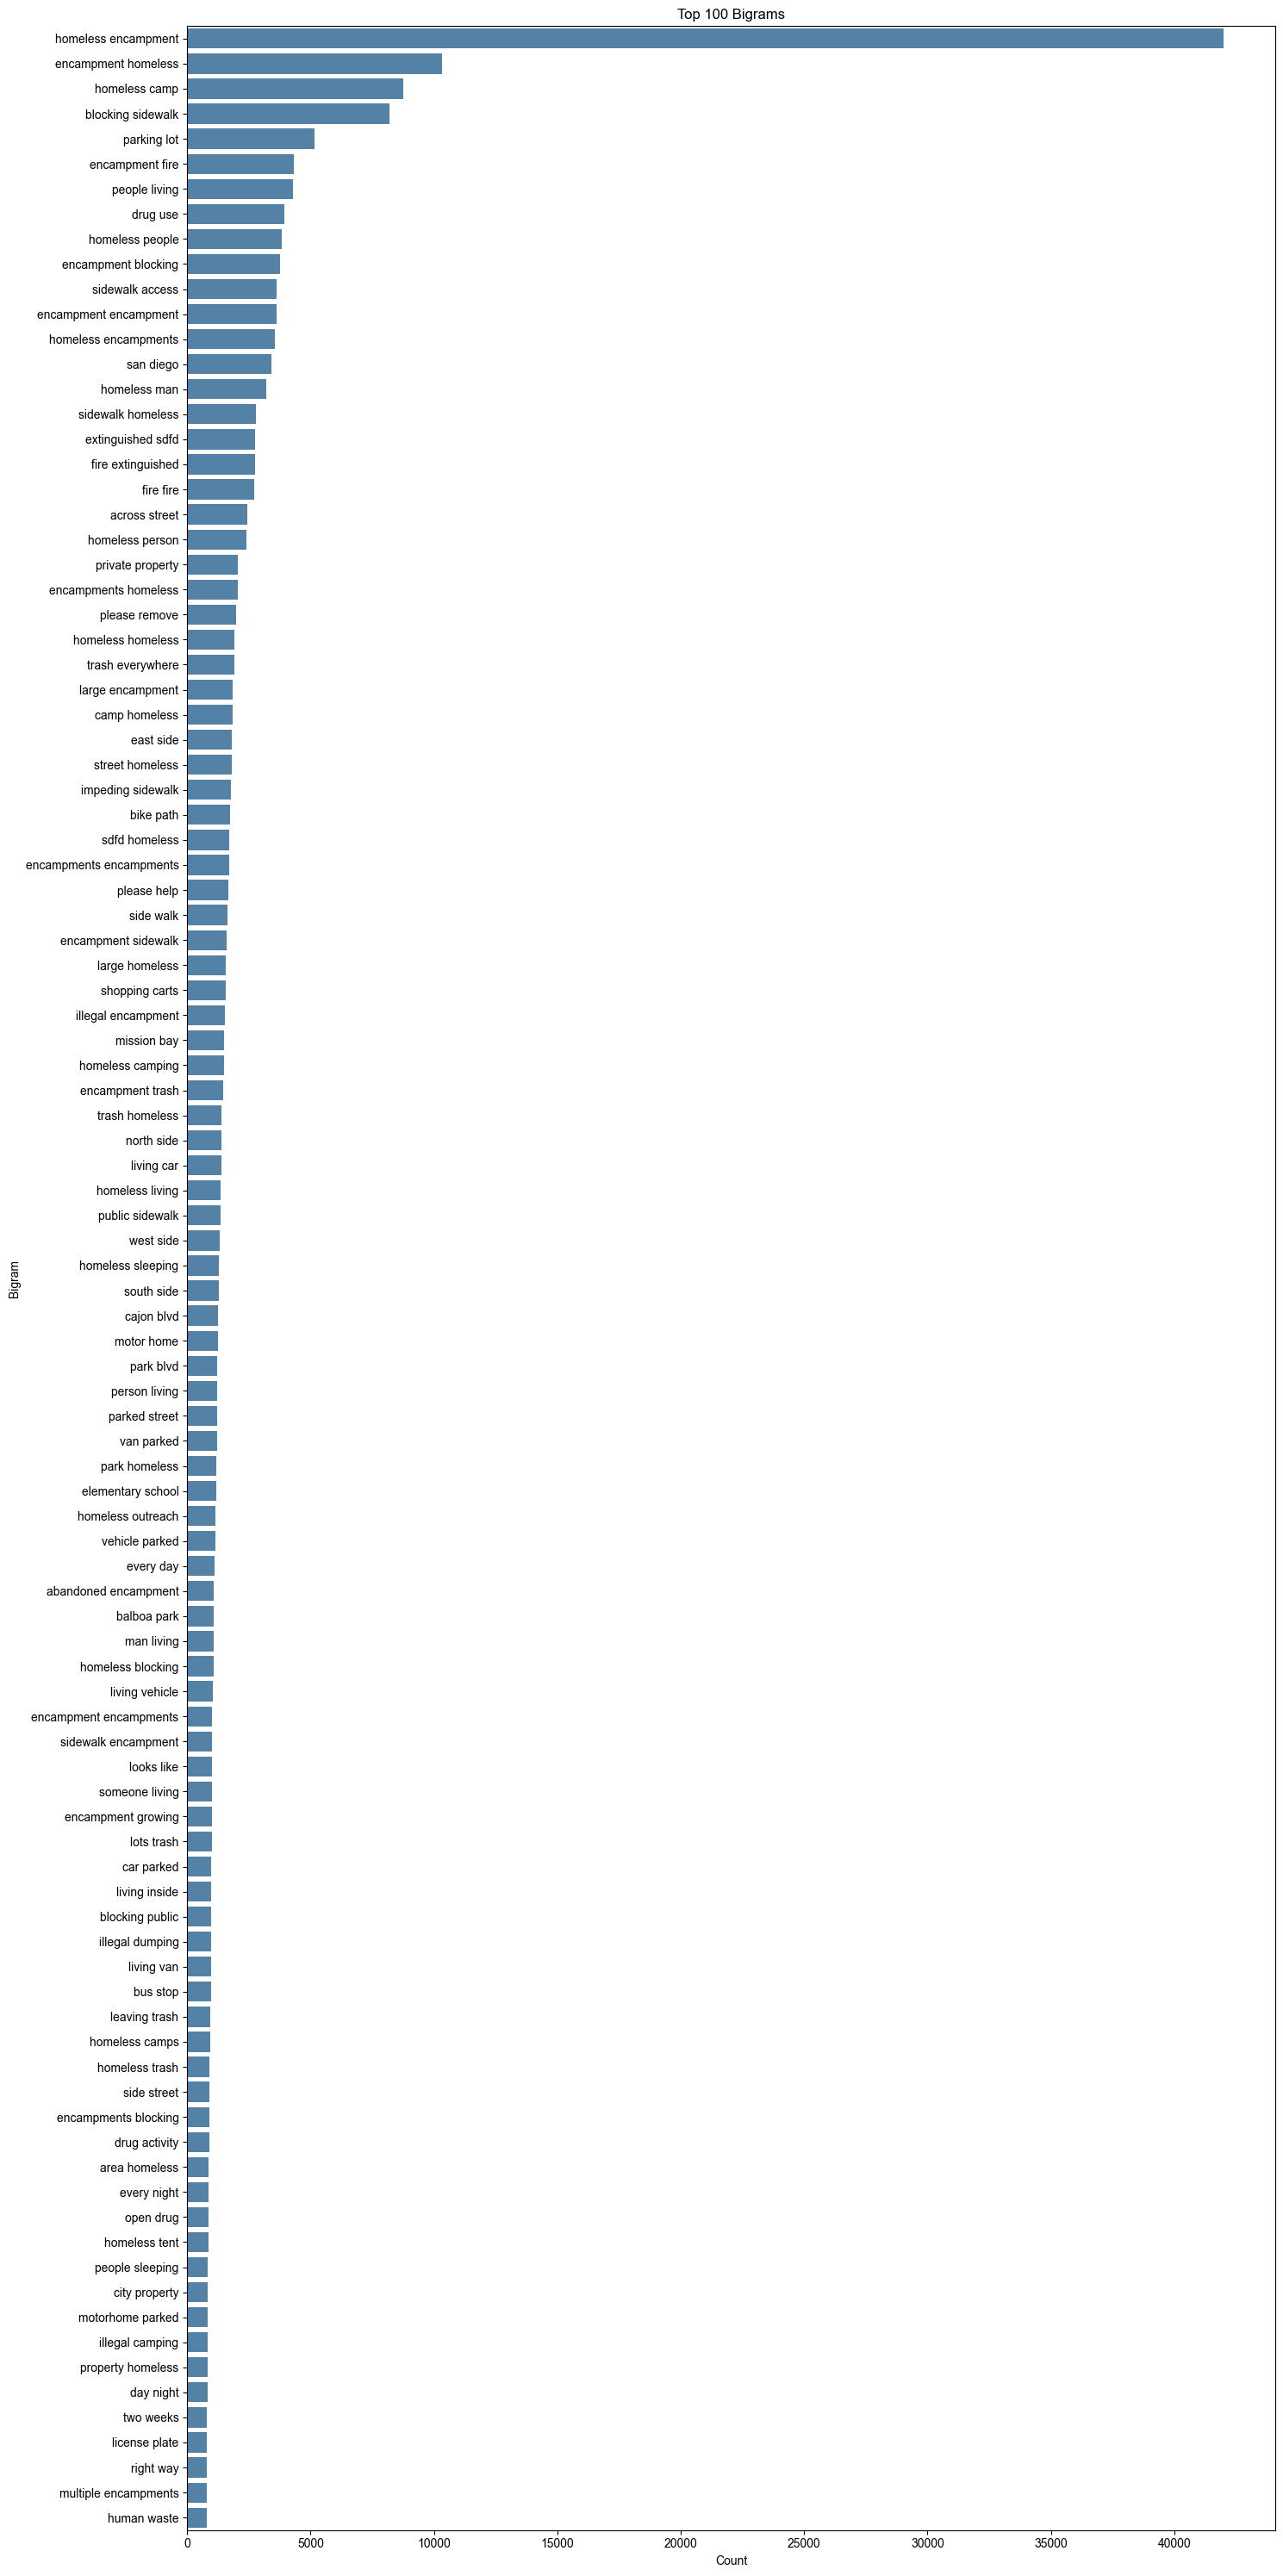

In [274]:
plt.figure(figsize=(15,30))
sns.barplot(data=freq_df.head(100), x="count", y="bigram", color="steelblue")
plt.title(f"Top 100 Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.tight_layout()
plt.savefig("Top 100 Bigrams", dpi=300, bbox_inches='tight')
plt.show()

In [205]:
trigram_freq_dict = {}

all_text = " ".join(data_concat["clean_text"])
tokens = word_tokenize(all_text)
tokens = [w.lower() for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]
trigrams = list(ngrams(tokens, 3))
trigram_freq = Counter(trigrams)

freq_df = (
    pd.DataFrame(trigram_freq.items(), columns=["trigram", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
    )
    

freq_df["trigram"] = freq_df["trigram"].apply(lambda x: " ".join(x))
    
trigram_freq_dict[year] = freq_df
len(freq_df)

1346899

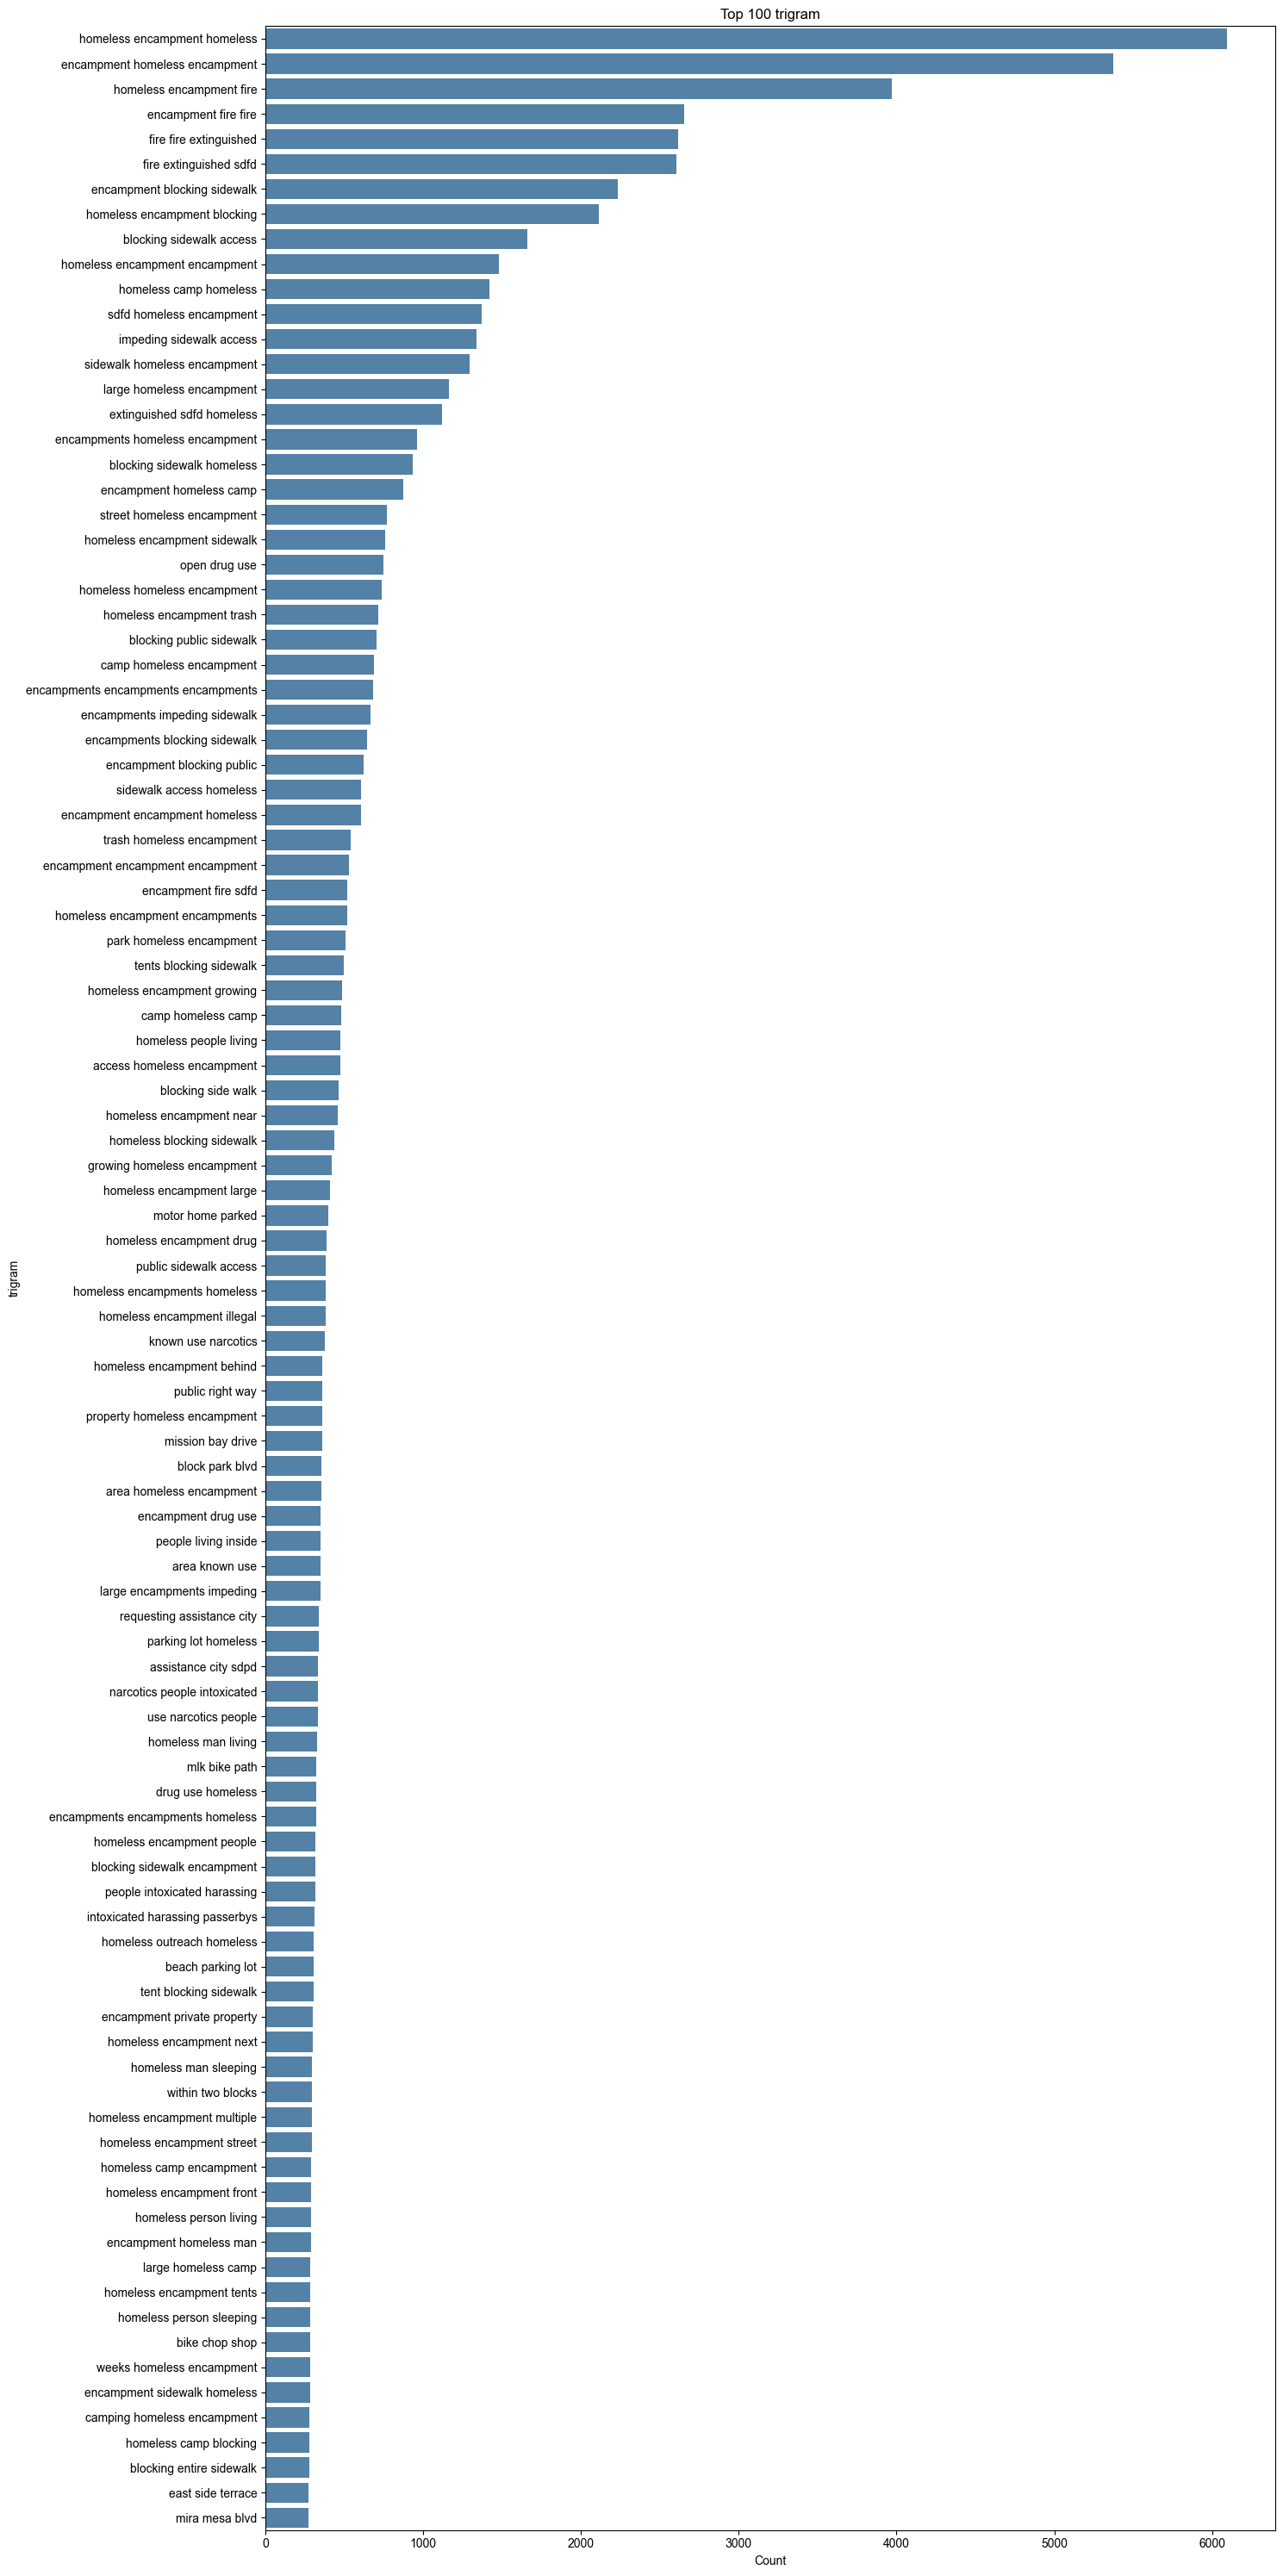

In [206]:
plt.figure(figsize=(15,30))
sns.barplot(data=freq_df.head(100), x="count", y="trigram", color="steelblue")
plt.title(f"Top 100 trigram")
plt.xlabel("Count")
plt.ylabel("trigram")
plt.tight_layout()

plt.show()

In [207]:
fourgram_freq_dict = {}


all_text = " ".join(data_concat["clean_text"])
tokens = word_tokenize(all_text)
tokens = [w.lower() for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]
fourgrams = list(ngrams(tokens, 4))
fourgram_freq = Counter(fourgrams)

freq_df = (
    pd.DataFrame(fourgram_freq.items(), columns=["fourgram", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
    )
    

freq_df["fourgram"] = freq_df["fourgram"].apply(lambda x: " ".join(x))
    
fourgram_freq_dict[year] = freq_df
len(freq_df)

1717660

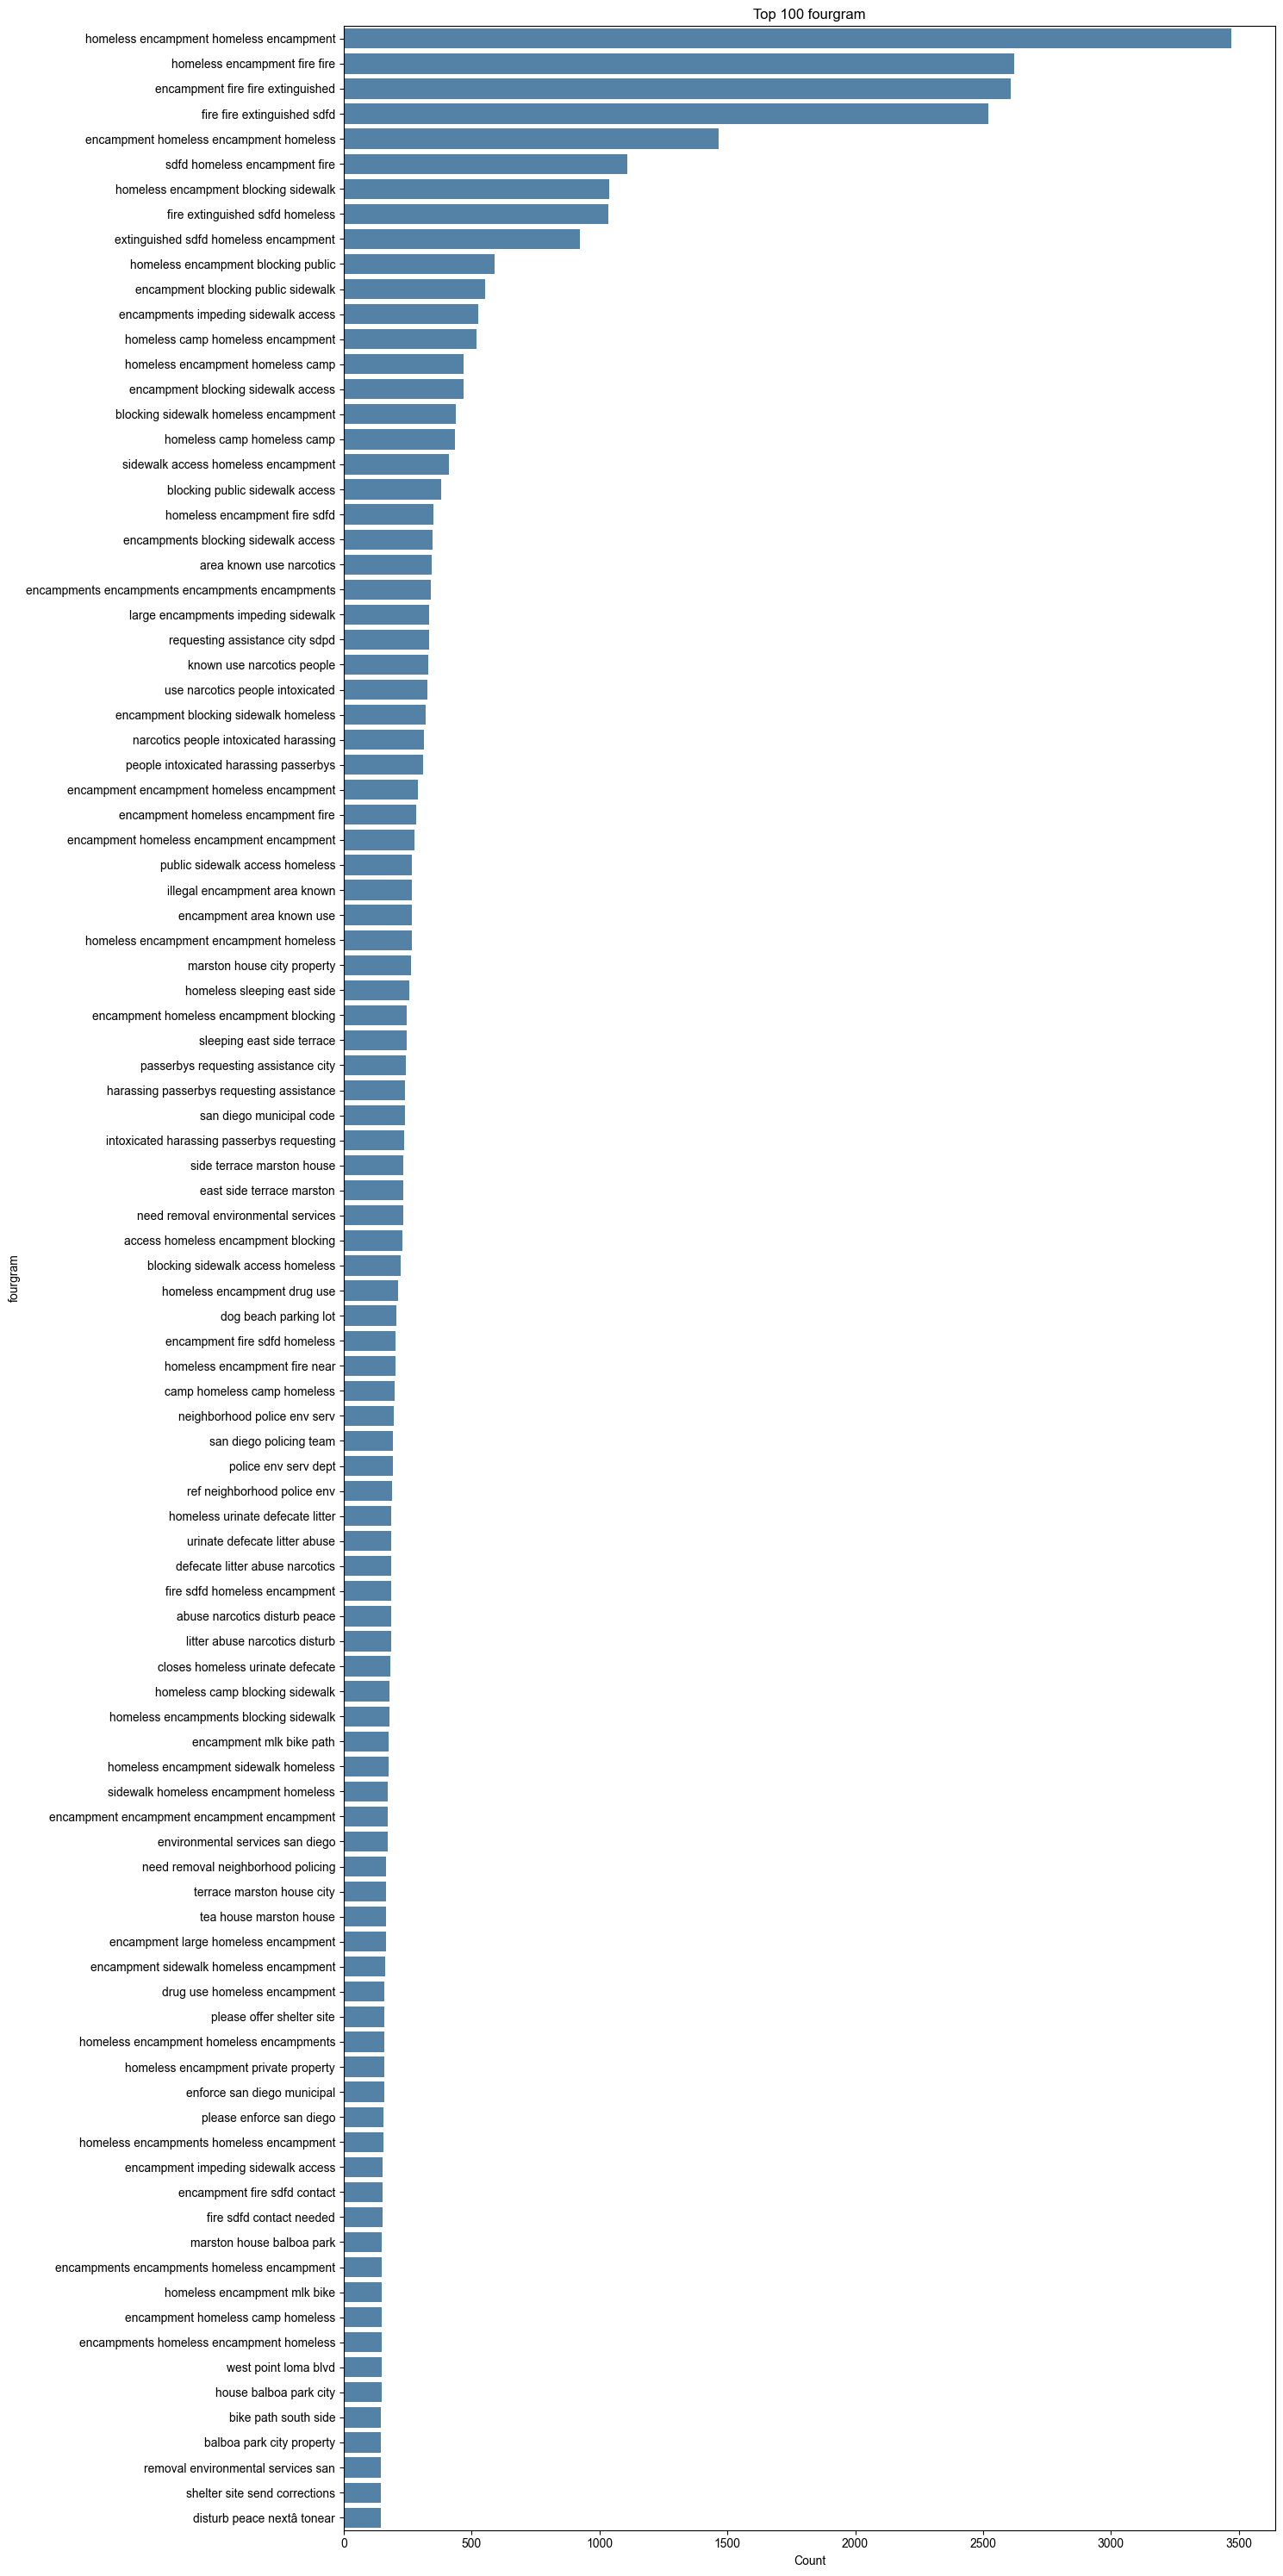

In [209]:
plt.figure(figsize=(15,30))
sns.barplot(data=freq_df.head(100), x="count", y="fourgram", color="steelblue")
plt.title(f"Top 100 fourgram")
plt.xlabel("Count")
plt.ylabel("fourgram")
plt.tight_layout()
plt.show()

### (3) Co-occurrence

In [219]:
from itertools import combinations

co_matrix_dict = {}  
 
cooccurrence_counter = Counter() 
    
for text in data_concat["clean_text"].dropna():
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w.isalpha() and len(w) > 2 and w not in stop_words]   #w.isalpha() and 
    unique_tokens = list(set(tokens))
    pairs = combinations(unique_tokens, 2)
    cooccurrence_counter.update(pairs)
    
cooccurrence_df = pd.DataFrame(cooccurrence_counter.items(), columns=["pair", "count"])
cooccurrence_df["word1"] = cooccurrence_df["pair"].apply(lambda x: x[0])
cooccurrence_df["word2"] = cooccurrence_df["pair"].apply(lambda x: x[1])
cooccurrence_df = cooccurrence_df[["word1", "word2", "count"]].sort_values(by="count", ascending=False)
    
top_words = pd.Series(
    pd.concat([cooccurrence_df["word1"], cooccurrence_df["word2"]])
    ).value_counts().head(200).index

filtered_df = cooccurrence_df[
    cooccurrence_df["word1"].isin(top_words) & cooccurrence_df["word2"].isin(top_words)
    ]

co_matrix = filtered_df.pivot_table(index="word1", columns="word2", values="count", fill_value=0)
co_matrix = co_matrix + co_matrix.T
co_matrix_dict[year] = co_matrix
co_matrix.shape

(200, 200)

In [220]:
top_words = pd.Series(
    pd.concat([cooccurrence_df["word1"], cooccurrence_df["word2"]])
).value_counts().head(50).index
top_words

Index(['homeless', 'street', 'encampment', 'people', 'trash', 'living',
       'please', 'area', 'sidewalk', 'park', 'parking', 'front', 'lot', 'camp',
       'property', 'man', 'behind', 'parked', 'side', 'one', 'blocking', 'day',
       'tents', 'back', 'also', 'tent', 'ave', 'next', 'camping', 'drug',
       'weeks', 'near', 'large', 'encampments', 'get', 'corner', 'across',
       'around', 'right', 'months', 'days', 'drugs', 'building', 'along',
       'set', 'week', 'person', 'walk', 'two', 'use'],
      dtype='object')

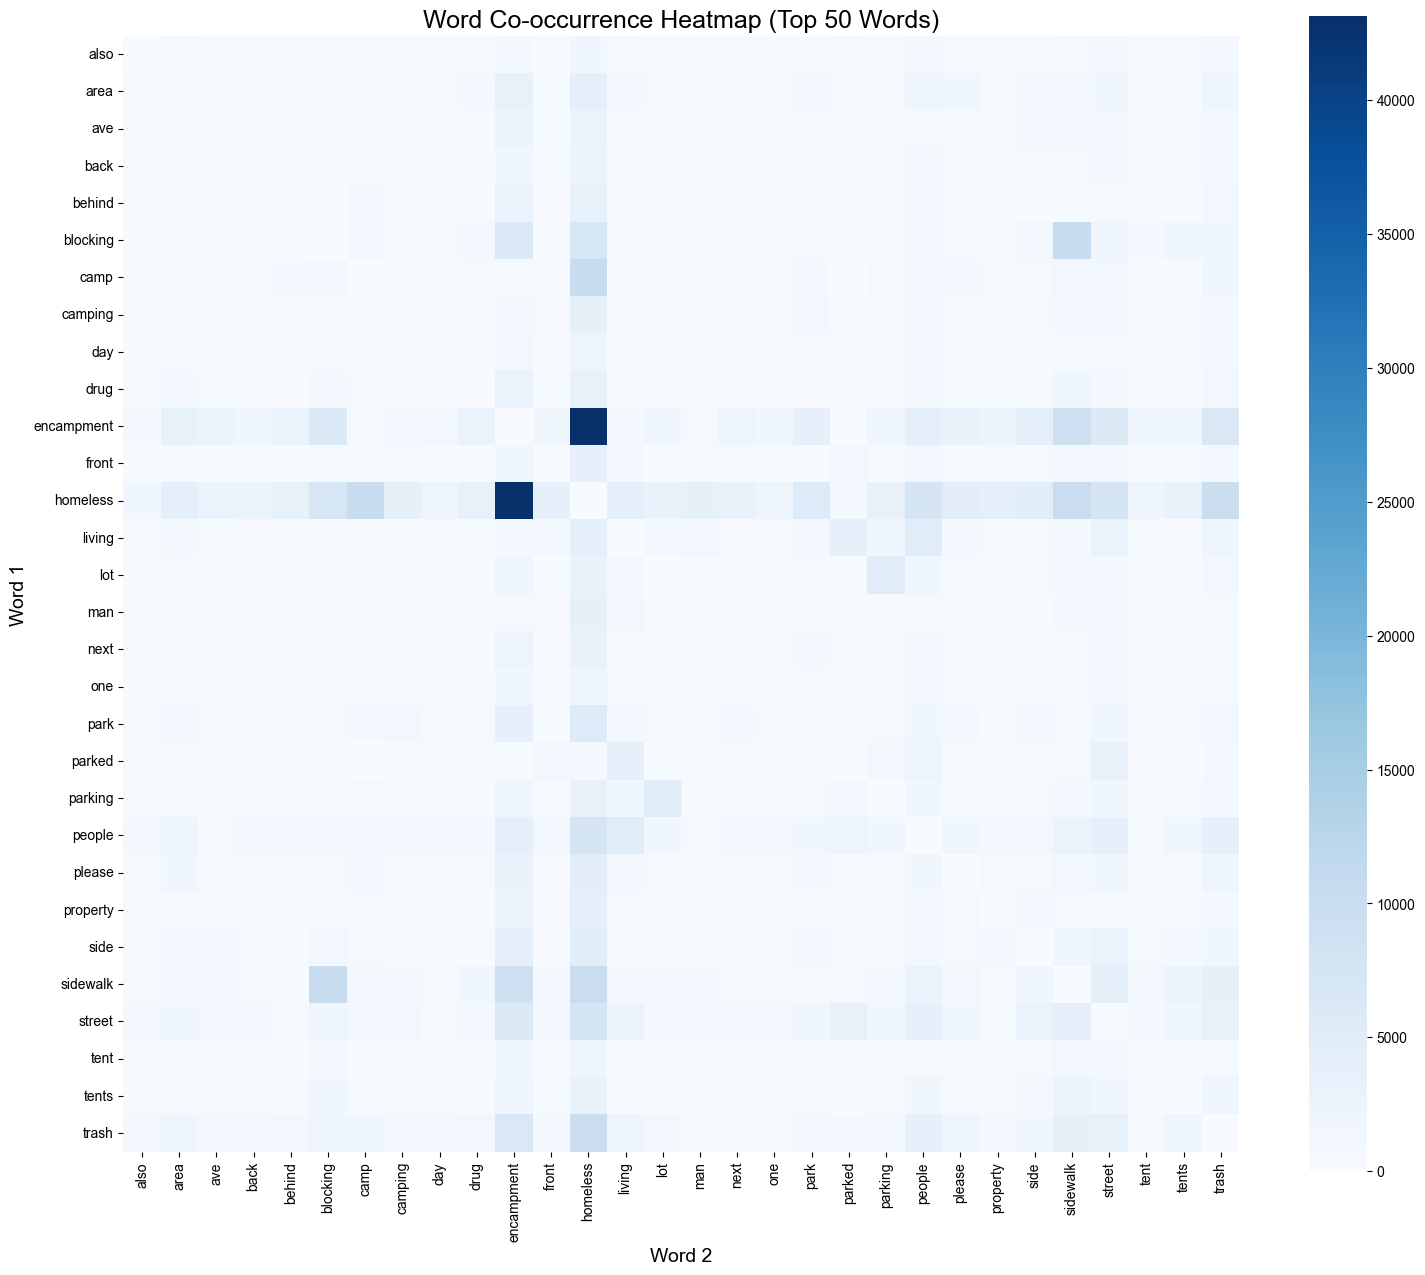

In [222]:
top_words = pd.Series(
    pd.concat([cooccurrence_df["word1"], cooccurrence_df["word2"]])
).value_counts().head(30).index

filtered_df = cooccurrence_df[
    cooccurrence_df["word1"].isin(top_words) &
    cooccurrence_df["word2"].isin(top_words)
]

co_matrix = filtered_df.pivot_table(
    index="word1", columns="word2", values="count", fill_value=0
)

co_matrix = co_matrix + co_matrix.T

plt.figure(figsize=(18, 15))
sns.heatmap(co_matrix, cmap="Blues", square=True)
plt.title("Word Co-occurrence Heatmap (Top 50 Words)", fontsize=18)
plt.xlabel("Word 2", fontsize=14)
plt.ylabel("Word 1", fontsize=14)
plt.show()

In [228]:
def get_top_cooccurrence(word, cooccurrence_df, top_n=10):
    mask = (cooccurrence_df["word1"] == word) | (cooccurrence_df["word2"] == word)
    subset = cooccurrence_df[mask]
    subset = subset.copy() 
    subset["other"] = subset.apply(
        lambda row: row["word2"] if row["word1"] == word else row["word1"], axis=1
    )

    top_partners = subset[["other", "count"]].sort_values(by="count", ascending=False).head(top_n)
    return top_partners


target_words = ["encampment", "drug", "vehicle", "trash", "aggressive", "old", "mental", "dead"]


for word in target_words:
    print(f"\n=== Top co-occurrences with '{word}' ===")
    print(get_top_cooccurrence(word, cooccurrence_df, top_n=20).to_string(index=False))


=== Top co-occurrences with 'encampment' ===
       other  count
    homeless  42837
    sidewalk   8958
       trash   6327
    blocking   5960
      street   5765
        fire   5496
        sdfd   4246
      people   4058
       large   4003
        park   3700
        side   3680
        area   3518
      please   3093
extinguished   2912
        near   2817
        drug   2752
      behind   2700
      access   2511
         ave   2503
         use   2440

=== Top co-occurrences with 'drug' ===
     other  count
       use   3297
  homeless   3215
encampment   2752
  sidewalk   1600
     trash   1361
      open   1104
  activity    929
      area    869
       use    793
    people    626
    public    625
      park    623
    please    574
    access    574
  blocking    513
   addicts    511
   illegal    496
    street    483
   camping    479
  blocking    465

=== Top co-occurrences with 'vehicle' ===
     other  count
    parked   2302
    living   1460
   parking    853
 

In [230]:
def get_top_cooccurrence(word, cooccurrence_df, top_n=50):
    mask = (cooccurrence_df["word1"] == word) | (cooccurrence_df["word2"] == word)
    subset = cooccurrence_df[mask].copy()

    subset.loc[:, "other"] = subset.apply(
        lambda row: row["word2"] if row["word1"] == word else row["word1"], axis=1
    )

    return subset[["other", "count"]].sort_values(by="count", ascending=False).head(top_n)

In [275]:
from wordcloud import WordCloud

def plot_cooccurrence_wordcloud(target_word, cooccurrence_df, top_n=50):
    top_df = get_top_cooccurrence(target_word, cooccurrence_df, top_n=top_n)
    freq_dict = dict(zip(top_df["other"], top_df["count"]))

    wc = WordCloud(
        width=1200,
        height=800,
        background_color="white",
        colormap="Dark2",
        prefer_horizontal=1.0
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Top Co-occurring Words with '{target_word}'", fontsize=18)
    plt.savefig(f"Top Co-occurring Words with '{target_word}'.png", dpi=300, bbox_inches='tight')
    plt.show()

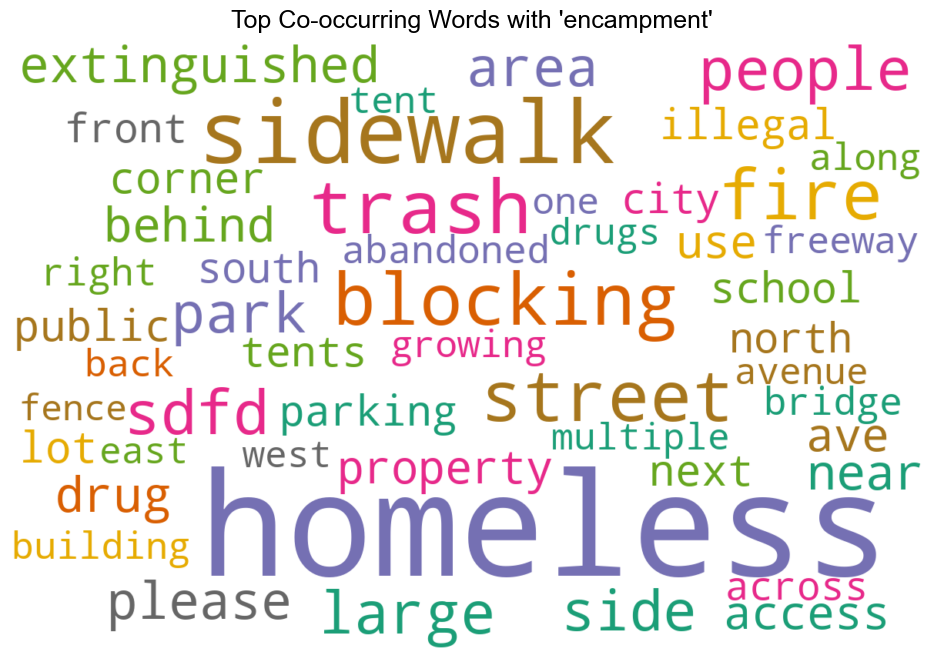

In [276]:
plot_cooccurrence_wordcloud("encampment", cooccurrence_df, top_n=50)

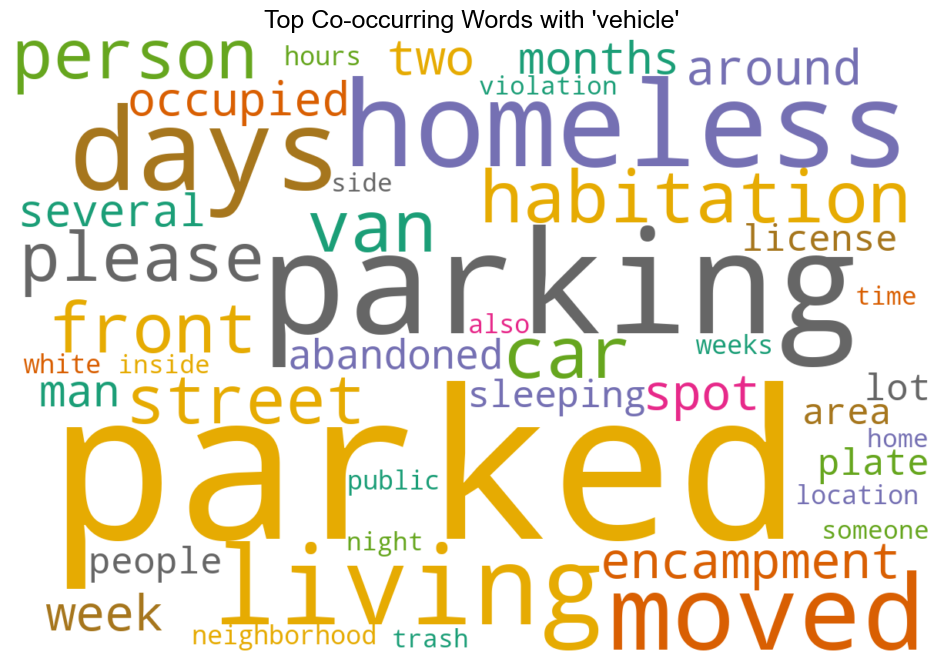

In [277]:
plot_cooccurrence_wordcloud("vehicle", cooccurrence_df, top_n=50)

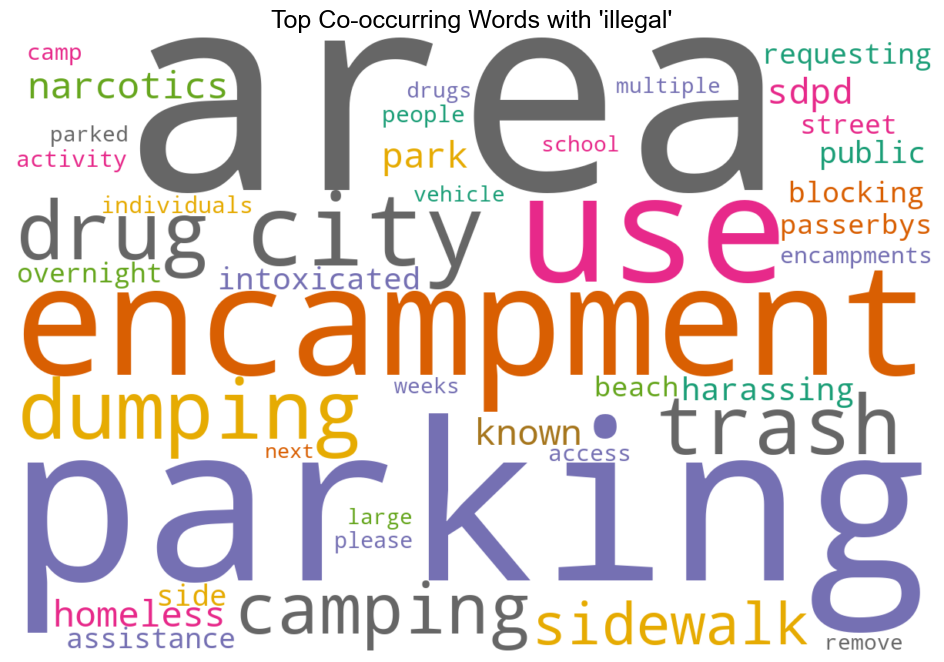

In [236]:
plot_cooccurrence_wordcloud("illegal", cooccurrence_df, top_n=50)

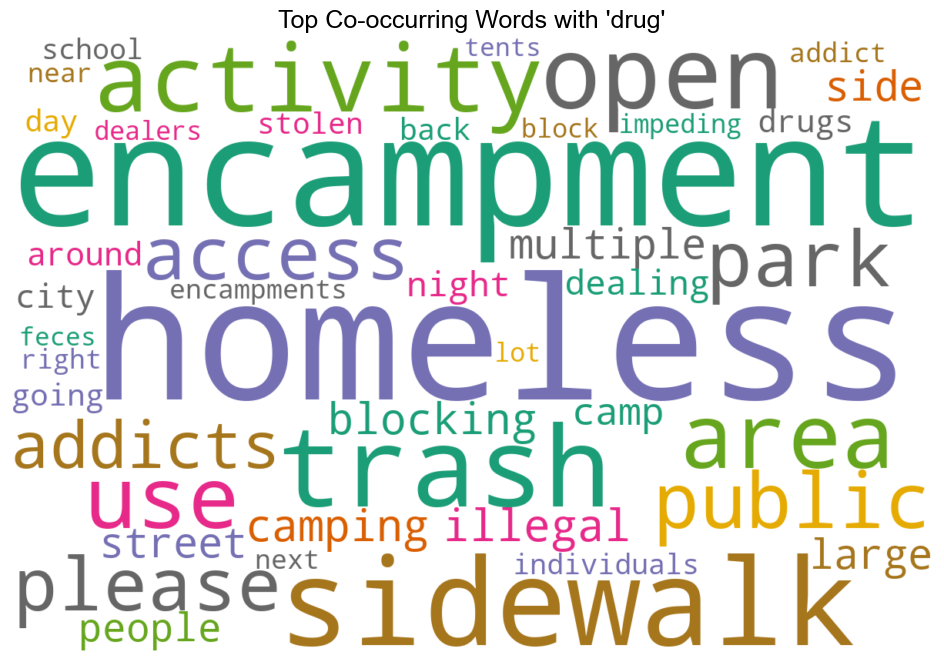

In [237]:
plot_cooccurrence_wordcloud("drug", cooccurrence_df, top_n=50)

In [258]:
data_concat.head()

service_request_id sap_notification_number date_requested  case_age_days  \
0             2856645                    None     2020-01-19              2   
1             2856658                    None     2020-01-19              2   
2             2856660                    None     2020-01-19              2   
3             2856674                    None     2020-01-19              0   
4             2856676                    None     2020-01-19              5   

        case_record_type service_name date_closed  status        lat  \
0  Neighborhood Policing   Encampment  2020-01-21  Closed  32.690739   
1  Neighborhood Policing   Encampment  2020-01-21  Closed  32.739258   
2  Neighborhood Policing   Encampment  2020-01-21  Closed  32.755149   
3  Neighborhood Policing   Encampment  2020-01-19  Closed  32.739992   
4   ESD Complaint/Report   Encampment  2020-01-24  Closed  32.749275   

          lng  ...                           clean_text_for_sentiment  \
0 -117.094065  ...                                         Trash left   
1 -117.158897  ...  Homeless people smoking crack next to playgrou...   
2 -117.085003  ...  People outside back gate, confrontational, smo...   
3 -117.244911  ...  Homeless person in front yard of recently sold...   
4 -117.161033  ...  This alley has become a regular living area fo...   

  misspelled_words  num_misspelled  year month day        date time  \
0               []               0  2020     1  19  2020-01-19    1   
1               []               0  2020     1  19  2020-01-19    1   
2               []               0  2020     1  19  2020-01-19    1   
3               []               0  2020     1  19  2020-01-19    1   
4        [wouldnt]               1  2020     1  19  2020-01-19    1   

  time_period week_type  
0        Dark   Weekend  
1        Dark   Weekend  
2        Dark   Weekend  
3        Dark   Weekend  
4        Dark   Weekend  

[5 rows x 38 columns]

In [265]:
monthly_counts = (
    data_concat.groupby(["year", "month"])
               .size()
               .reset_index(name="counts")
               .sort_values(["year", "month"])
)

monthly_counts["year_month"] = (
    monthly_counts["year"].astype(str) + "-" +
    monthly_counts["month"].astype(str).str.zfill(2)
)

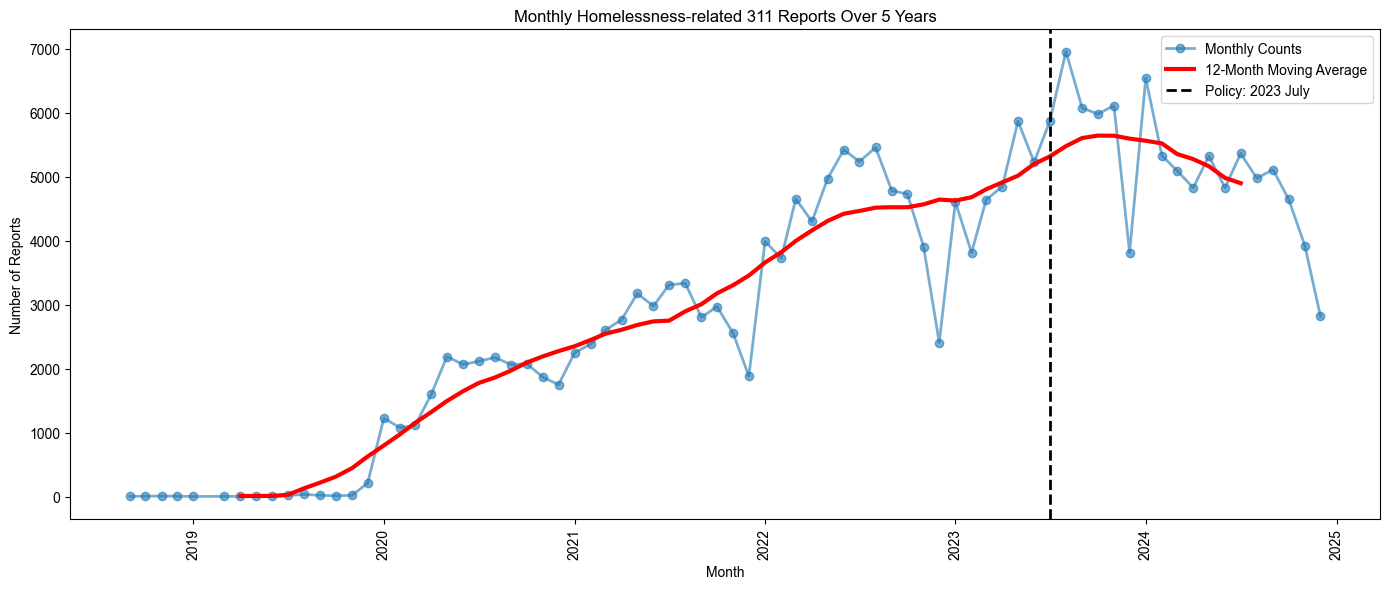

In [269]:
data_concat["year_month"] = data_concat["date_requested"].dt.to_period("M").astype(str)

monthly_counts = data_concat.groupby("year_month").size()

monthly_counts_ma = monthly_counts.rolling(window=12, center=True).mean()
monthly_counts.index = pd.to_datetime(monthly_counts.index)
monthly_counts_ma.index = pd.to_datetime(monthly_counts_ma.index)

plt.figure(figsize=(14, 6))
plt.plot(monthly_counts.index, monthly_counts.values, 
         marker='o', linewidth=2, alpha=0.6, label="Monthly Counts")

plt.plot(monthly_counts_ma.index, monthly_counts_ma.values,
         color="red", linewidth=3, label="12-Month Moving Average")

plt.axvline(pd.Timestamp("2023-07-01"), 
            color="black", linestyle="--", linewidth=2, label="Policy: 2023 July")

plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.title("Monthly Homelessness-related 311 Reports Over 5 Years")
plt.legend()
plt.tight_layout()
plt.savefig("Monthly Homelessness-related 311 Reports Over 5 Years.png", dpi=300, bbox_inches='tight')
plt.show()